In [6]:
### for MacOS or Linux ###
# check whats in the root folder
from subprocess import check_output
print(check_output(['ls', './']).decode('utf8'))

# Imports

In [1]:
import sys
### for Mac
# sys.path.insert(0, '/Users/xiaopupeng/dropbox/workspace/cqsim-redux/')
### for PC
sys.path.insert(0, 'C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/')
import os
import copy
from datetime import datetime
import time
import re
import random
import numpy as np
import pandas as pd
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import itertools
# import Redux as rd
plt.style.use('ggplot')
# plt.style.use('default')

In [2]:
### For Mac
# path_main='/Users/xiaopupeng/dropbox/workspace/cqsim-redux/'
### for PC
path_main='C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/'
path_data=path_main+'data/'
redux_src=path_main+'srcREDUX/'
cqsim_src=path_main+'srcCQSim/'
sys.path.append(path_main)

In [3]:
### CQSim modules ###
# preprocess
import srcCQSim.Filter.Filter_job_SWF as FilterJob
import srcCQSim.CqSim.Job_trace as JobTrace
import srcCQSim.Filter.Filter_node_SWF as FilterNode
import srcCQSim.CqSim.Node_struc as NodeStruc
# algorithms
import srcCQSim.CqSim.Start_window as StartWindow
# record the results
import srcCQSim.CqSim.Info_collect as InfoCollect
# import srcCQSim.Output_log as OutputLog

# new module of renewable energy aware
import srcCQSim.CqSim.power as Power
# simulator
import srcCQSim.ReCqsim_sim as CqsimSim

### REDUX modules ###
import srcREDUX.REDUX.DataIO as dataIO
import srcREDUX.REDUX.Update as update
import srcREDUX.REDUX.Predict_Smooth as predict_smooth
import srcREDUX.REDUX.Results as results
import srcREDUX.ReduxSim as ReduxSim

In [4]:
#ReCq module
import ReCqSim
#main method
import cqsim_redux as cr

# Initialize

In [5]:
# assign default value to all parameters
def initCQ():
    inputCQ = {
    ### job trace name and save file names ###
    # 'job_trace': 'test2.swf',
    # 'job_save': 'jobSave_test2',
#     'job_trace': 'SDSC-SP2-1998-4.2-cln.swf',
#     'job_trace': 'SDSC-BLUE-2000-4.2-cln.swf',
    'job_trace': 'Sandia-Ross-2001-1.1-cln.swf',
#     'job_trace': 'LLNL-Atlas-2006-2.1-cln.swf',
#     'job_trace': 'UniLu-Gaia-2014-1.swf',
    'job_save': 'jobSave_SDSC-SP2-1998-4.2-cln',
    ### system config ###
    'cluster_fraction': 1.0,
    'start': 0.0,
    'start_date': 'None',
    'anchor': 0,
    'read_num': 18000,
    ### algorithm config ###
    # w:job wait time s: submit time t: requested time n: requested processors q:priority queue
    'win': 1, # =1 for window_check mode, other for no check
    'win_para': ['5', '0', '0'],
    #start window module parameter: [window size],[check size],[max start size],[max window size]
    ### config of names ###
    'config': 'config.set',
    'pre_name': "CQSIM_",
    'path_in': path_data+'InputCQSim/',
    'path_fmt': path_data+'Fmt/',
    #### 0:Read original file  1:Read formatted file ###
    'resource_job': 0,
    'resource_node': 0
    }
    return inputCQ

def initRE():
    inputRE = {
    # ### CONSTANT ###
    # ratio of stats count when start the arithmetic average estimate
    'scaleRatio': 0.01,
    # ability of ups devise, could be more sophisticated in future (kWh)
    'upsCapability': 500,
    # the workload processing capability of data center (in processors)
    # 'dataCenterCap': 2500,
    'nodNum': 1152,
    'procPerNode': 8,
    # ups and renewable energy price ($)
    'upsPrice': 0.02,
    'solarPrice': 0.09,
    'windPrice': 0.15,
    # ### INITIALIZE ###
    # the initialized threshold of grid price ($)
    'initGridpriceThreshold': 1.0,
    # initialized high and low ratio of current workload for workload shaving
    'initCurWorkloadRatio': 0.2,
    # initialized stable renewable supply level
    'initStableRenSupply': 500,
    ### config of names ###
    'path_in': path_data+'InputREDUX/',
    'path_out': path_data+'REDUXResults/',
    }
    return inputRE

inputCQ=initCQ()
inputRE=initRE()

In [6]:
cr.showInputAndSetName(inputCQ, inputRE)
trace_name = inputCQ['path_in'] + inputCQ['job_trace']
save_name_j = inputCQ['path_fmt'] + inputCQ['job_save'] + '.csv'
config_name_j = inputCQ['path_fmt'] + inputCQ['job_save'] + '.txt'

....................
job_trace: Sandia-Ross-2001-1.1-cln.swf
job_save: jobSave_SDSC-SP2-1998-4.2-cln
cluster_fraction: 1.0
start: 0.0
start_date: None
anchor: 0
read_num: 18000
win: 1
win_para: ['5', '0', '0']
config: config.set
pre_name: CQSIM_
path_in: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/InputCQSim/
path_fmt: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/Fmt/
resource_job: 0
resource_node: 0
....................
scaleRatio: 0.01
upsCapability: 500
nodNum: 1152
procPerNode: 8
upsPrice: 0.02
solarPrice: 0.09
windPrice: 0.15
initGridpriceThreshold: 1.0
initCurWorkloadRatio: 0.2
initStableRenSupply: 500
path_in: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/InputREDUX/
path_out: C:/Users/xzp0007/Dropbox/Workspace/CQSim-REDUX/data/REDUXResults/
....................


In [7]:
%whos

Variable         Type        Data/Info
--------------------------------------
CqsimSim         module      <module 'srcCQSim.ReCqsim<...>rcCQSim\\ReCqsim_sim.py'>
FilterJob        module      <module 'srcCQSim.Filter.<...>lter\\Filter_job_SWF.py'>
FilterNode       module      <module 'srcCQSim.Filter.<...>ter\\Filter_node_SWF.py'>
InfoCollect      module      <module 'srcCQSim.CqSim.I<...>\CqSim\\Info_collect.py'>
JobTrace         module      <module 'srcCQSim.CqSim.J<...>im\\CqSim\\Job_trace.py'>
NodeStruc        module      <module 'srcCQSim.CqSim.N<...>m\\CqSim\\Node_struc.py'>
Power            module      <module 'srcCQSim.CqSim.p<...>cCQSim\\CqSim\\power.py'>
ReCqSim          module      <module 'ReCqSim' from 'C<...>CQSim-REDUX\\ReCqSim.py'>
ReduxSim         module      <module 'srcREDUX.ReduxSi<...>\\srcREDUX\\ReduxSim.py'>
StartWindow      module      <module 'srcCQSim.CqSim.S<...>\CqSim\\Start_window.py'>
config_name_j    str         C:/Users/xzp0007/Dropbox/<...>SDSC-SP2-1998

# Module Stucture & Init 

In [7]:
### CQSim modules ###
print( ".................... Job Filter" )
module_filter_job = FilterJob.Filter_job_SWF(trace=trace_name, save=save_name_j, config=config_name_j)
module_filter_job.read_job_trace()
module_filter_job.output_job_data()
module_filter_job.output_job_config()

print( ".................... Job Trace" )
module_job_trace = JobTrace.Job_trace(start=inputCQ['start'],num=inputCQ['read_num'],anchor=inputCQ['anchor'],density=inputCQ['cluster_fraction'])
module_job_trace.import_job_file(save_name_j)
module_job_trace.import_job_config(config_name_j)

print("................ Power Profile")
module_pow = Power.Power(job_module=module_job_trace)
# power profile input: 1.processors 2.runtime
# power supply input:

print( ".................... Start Window" )
module_win = StartWindow.Start_window(mode=inputCQ['win'],power_module=module_pow,para_list=inputCQ['win_para'])

print( ".................... Information Collect" )
module_info_collect = InfoCollect.Info_collect()

# # Output Log
# print( ".................... Output Log" )
# module_output_log = OutputLog.Output_log (output=output_fn)

### REDUX modules ###
print(".................... Data Input")
input_module = dataIO.DataIO(inputPara = inputRE)
input_module.loadData()
inputRE['dataSize'] = input_module.data_size
print('data size:', inputRE['dataSize'])

print(".................... Update")
update_module = update.Update(inputPara=inputRE)

print(".................... Predict&Smooth")
predict_smooth_module = predict_smooth.Predict_Smooth(inputRE, update_module)

print(".................... Smooth")
results_module = results.Results()

# print(".................... Print Output")
# output_module = dataIO.DataIO(inputRE)

# Cqsim Simulator
print( ".................... Cqsim Simulator" )
module_list_cq = {
'job':module_job_trace,
'win':module_win,
'pow':module_pow,
'info':module_info_collect
# 'output':module_output_log
}
module_CQsim = CqsimSim.Cqsim_sim(module_list=module_list_cq)
module_list_cq['CQsim']=module_CQsim

# REDUX Simulator
print(".................... Redux Simulator")
module_list_re = {
'input':input_module,
'update': update_module,
'predsmoo': predict_smooth_module,
'results': results_module
# 'output':output_module
}
module_REsim = ReduxSim.Redux_Sim(module_list=module_list_re)
module_list_re['REsim']=module_REsim


.................... Job Filter
.................... Job Trace
{'date': 'Thu Nov 29 12:11:26 MST 2001', 'start_offset': '0.0'}
................ Power Profile
.................... Start Window
.................... Information Collect
.................... Data Input
data size: 2568
.................... Update
.................... Predict&Smooth
.................... Smooth
.................... Cqsim Simulator
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
.................... Redux Simulator
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load


# StartSim 

## ren-aware 

In [8]:
# Init Integraded Simulator
module_sim = ReCqSim.ReCqSim(module_list_cq=module_list_cq, module_list_re=module_list_re)

>>>>>>>>>>>>>> ReCqSim modules list:
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
Cqsim Sim ................... Load
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load
ReduxSim ................... Load


In [9]:
print('======================','ren-aware Sim','======================')
curHour = 0
dataSize = module_sim.REmod['input'].get_data_size()
print('data size >>>>>>>>>>>>>>>>>>>>', dataSize)
dataCenterCap = module_sim.REmod['update'].data_center_cap() // 40
print('data center Capabiliy >>>>>>>>>>>>>>>>>>>>', dataCenterCap)
dataCenterCapScaleRatio = 0.5
highDataCenterCap = round(dataCenterCap * (1+dataCenterCapScaleRatio))
lowDataCenterCap = round(dataCenterCap * (1-dataCenterCapScaleRatio))
module_sim.CQmod['CQsim'].fill_jobList()
while curHour < dataSize:# Init Integraded Simulator
    print('>>>>>>>>>>>>>>>>> current time (in hours):', curHour)
    renState = module_sim.get_renState(curHour)
    if renState == 'available':
        dataCenterCap = highDataCenterCap
    elif renState == 'outage':
        dataCenterCap = lowDataCenterCap
    else:
        print('Error: no renState')
        break
    workload, module_sim.workloadList = module_sim.CQmod['CQsim'].renaware_workload(module_sim.curTime, renState, dataCenterCap)
    module_sim.curTime += module_sim.timeInterval
    module_sim.REmod['REsim'].redux_sim(curHour, workload, renState)
    curHour += 1

====================== ren-aware Sim ======================
data size >>>>>>>>>>>>>>>>>>>> 2568
data center Capabiliy >>>>>>>>>>>>>>>>>>>> 230
job_num = >>>>>>>>>>>>>> 18000
>>>>>>>>>>>>>>>>> current time (in hours): 0
curTime>>>>>>>>>>>>>>> 3600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  345
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2180.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2180.8
workload =  2180.8 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 209.0
upsSupply= 0 upsStorage= 500
gridSupply= 1471.8000000000002
reduxCost= 913.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1
curTime>>>>>>>>>>>>>>> 7200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 140725.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 140725.6
workload =  140725.6 workloadBuffer= 0 renSupply= 241.0
s

stableRenSupply= 309.988
upsSupply= 0 upsStorage= 0
gridSupply= 518157.80000000005
reduxCost= 380798.3 
 

>>>>>>>>>>>>>>>>> current time (in hours): 35
curTime>>>>>>>>>>>>>>> 129600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  393
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 445714.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 445714.4
workload =  445714.4 workloadBuffer= 0 renSupply= 604.0
stableRenSupply= 335.844
upsSupply= 0 upsStorage= 0
gridSupply= 445110.4
reduxCost= 321303.26 
 

>>>>>>>>>>>>>>>>> current time (in hours): 36
curTime>>>>>>>>>>>>>>> 133200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 461358.39999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 461358.39999999997
workload =  461358.39999999997 workloadBuffer= 0 renSupply= 630.0
upsSupply= 0 upsStorage= 0
gridSupp

stableRenSupply= 259.684
upsSupply= 0 upsStorage= 0
gridSupply= 359601.39999999997
reduxCost= 146648.44 
 

>>>>>>>>>>>>>>>>> current time (in hours): 73
curTime>>>>>>>>>>>>>>> 266400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 325688.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 325688.0
workload =  325688.0 workloadBuffer= 0 renSupply= 145.0
stableRenSupply= 250.914
upsSupply= 0 upsStorage= 0
gridSupply= 325543.0
reduxCost= 125208.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 74
curTime>>>>>>>>>>>>>>> 270000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  353
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 315956.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 315956.0
workload =  315956.0 workloadBuffer= 0 renSupply= 226.0
stableRenSupply= 249.014
upsSupply= 0 upsStorage= 0
gridSupply= 

upsSupply= 0 upsStorage= 0
gridSupply= 1052986.2
reduxCost= 892683.09 
 

>>>>>>>>>>>>>>>>> current time (in hours): 111
curTime>>>>>>>>>>>>>>> 403200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  385
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 947140.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 947140.0
workload =  947140.0 workloadBuffer= 0 renSupply= 870.0
upsSupply= 0 upsStorage= 0
gridSupply= 946270.0
reduxCost= 793445.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 112
curTime>>>>>>>>>>>>>>> 406800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  601
notFilledProc after backfill =  6
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 947361.6000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 947361.6000000001
workload =  947361.6000000001 workloadBuffer= 0 renSupply= 789.0
upsSupply= 0 upsStorage= 0
gridSupply= 946572.6000000001
reduxCost= 789522.4 
 

>>>>>>>>>>>>>

workload =  1576961.6 workloadBuffer= 0 renSupply= 507.0
stableRenSupply= 361.863
upsSupply= 0 upsStorage= 0
gridSupply= 1576454.6
reduxCost= 1224645.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 139
curTime>>>>>>>>>>>>>>> 504000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1059
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2109539.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2109539.2
workload =  2109539.2 workloadBuffer= 0 renSupply= 227.0
stableRenSupply= 351.837
upsSupply= 0 upsStorage= 0
gridSupply= 2109312.2
reduxCost= 1639807.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 140
curTime>>>>>>>>>>>>>>> 507600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  2402
notFilledProc after defer =  2402
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1963770.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1963770.4000000001
workload =  1963770.4000000001 workloadBuffer

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2438560.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2438560.8
workload =  2438560.8 workloadBuffer= 0 renSupply= 131.0
stableRenSupply= 324.02
upsSupply= 0 upsStorage= 0
gridSupply= 2438429.8
reduxCost= 1615967.08 
 

>>>>>>>>>>>>>>>>> current time (in hours): 165
curTime>>>>>>>>>>>>>>> 597600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  111
notFilledProc after defer =  111
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2140038.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2140038.4
workload =  2140038.4 workloadBuffer= 0 renSupply= 57.0
upsSupply= 0 upsStorage= 0
gridSupply= 2139981.4
reduxCost= 1324871.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 166
curTime>>>>>>>>>>>>>>> 601200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  181
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2408889.6
Star

notFilledProc =  650
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2277144.8000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2277144.8000000003
workload =  2277144.8000000003 workloadBuffer= 0 renSupply= 244.0
upsSupply= -500 upsStorage= 500
gridSupply= 2277400.8000000003
reduxCost= 1336425.39 
 

>>>>>>>>>>>>>>>>> current time (in hours): 190
curTime>>>>>>>>>>>>>>> 687600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  141
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2345751.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2345751.2
workload =  2345751.2 workloadBuffer= 0 renSupply= 132.0
stableRenSupply= 296.975
upsSupply= 500 upsStorage= 0
gridSupply= 2344619.2
reduxCost= 1149202.67 
 

>>>>>>>>>>>>>>>>> current time (in hours): 191
curTime>>>>>>>>>>>>>>> 691200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  575
notFilledProc after bac

stableRenSupply= 314.169
upsSupply= 0 upsStorage= 0
gridSupply= 2605654.8
reduxCost= 1368276.46 
 

>>>>>>>>>>>>>>>>> current time (in hours): 214
curTime>>>>>>>>>>>>>>> 774000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  47
notFilledProc after defer =  47
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2533268.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2533268.0
workload =  2533268.0 workloadBuffer= 0 renSupply= 76.0
upsSupply= 0 upsStorage= 0
gridSupply= 2533192.0
reduxCost= 1203530.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 215
curTime>>>>>>>>>>>>>>> 777600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  425
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2506331.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2506331.2
workload =  2506331.2 workloadBuffer= 0 renSupply= 237.0
stableRenSupply= 308.452
upsSupply= 0 upsStorage= 0
gridSupply= 2506094.2
reduxCost= 948101.7 

curTime>>>>>>>>>>>>>>> 864000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  634
notFilledProc after backfill =  2
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2076284.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2076284.0
workload =  2076284.0 workloadBuffer= 0 renSupply= 140.0
stableRenSupply= 293.132
upsSupply= 500 upsStorage= 0
gridSupply= 2075144.0
reduxCost= 874156.65 
 

>>>>>>>>>>>>>>>>> current time (in hours): 240
curTime>>>>>>>>>>>>>>> 867600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  142
notFilledProc after defer =  142
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1896287.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1896287.2
workload =  1896287.2 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 0
gridSupply= 1896222.2
reduxCost= 722660.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 241
curTime>>>>>>>>>>>>>>> 871200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  187
notFill

upsSupply= 0 upsStorage= 500
gridSupply= 3185653.4000000004
reduxCost= 1074853.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 267
curTime>>>>>>>>>>>>>>> 964800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  289
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3346078.4000000004
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3346078.4000000004
workload =  3346078.4000000004 workloadBuffer= 0 renSupply= 151.0
upsSupply= 0 upsStorage= 500
gridSupply= 3345927.4000000004
reduxCost= 1102505.73 
 

>>>>>>>>>>>>>>>>> current time (in hours): 268
curTime>>>>>>>>>>>>>>> 968400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  569
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3253603.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3253603.2
workload =  3253603.2 workloadBuffer= 0 renSupply= 206.0
stableRenSupply= 298.83
upsSupply= 500 upsStorage= 0
gridSupply

upsSupply= 500 upsStorage= 0
gridSupply= 3173599.8
reduxCost= 1138489.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 290
curTime>>>>>>>>>>>>>>> 1047600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  365
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3136616.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3136616.8
workload =  3136616.8 workloadBuffer= 0 renSupply= 204.0
upsSupply= -500 upsStorage= 500
gridSupply= 3136912.8
reduxCost= 1064395.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 291
curTime>>>>>>>>>>>>>>> 1051200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3117607.1999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3117607.1999999997
workload =  3117607.1999999997 workloadBuffer= 0 renSupply= 163.0
stableRenSupply= 299.209
upsSupply= 500 upsStorage= 0
gridSupply= 3116444.199

curTime>>>>>>>>>>>>>>> 1126800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1152
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4584488.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4584488.0
workload =  4584488.0 workloadBuffer= 0 renSupply= 247.0
upsSupply= -500 upsStorage= 500
gridSupply= 4584741.0
reduxCost= 1733996.1 
 

>>>>>>>>>>>>>>>>> current time (in hours): 313
curTime>>>>>>>>>>>>>>> 1130400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  355
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4180948.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4180948.0
workload =  4180948.0 workloadBuffer= 0 renSupply= 150.0
stableRenSupply= 349.177
upsSupply= 500 upsStorage= 0
gridSupply= 4179798.0
reduxCost= 1509014.58 
 

>>>>>>>>>>>>>>>>> current time (in hours): 314
curTime>>>>>>>>>>>>>>> 1134000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc

stableRenSupply= 392.755
upsSupply= 0 upsStorage= 0
gridSupply= 3534286.8
reduxCost= 2185983.69 
 

>>>>>>>>>>>>>>>>> current time (in hours): 333
curTime>>>>>>>>>>>>>>> 1202400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  155
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3855679.1999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3855679.1999999997
workload =  3855679.1999999997 workloadBuffer= 0 renSupply= 179.0
stableRenSupply= 376.921
upsSupply= 0 upsStorage= 0
gridSupply= 3855500.1999999997
reduxCost= 2397762.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 334
curTime>>>>>>>>>>>>>>> 1206000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  109
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3793619.1999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3793619.1999999997
workload =  3793619.1999999997 workloadBuffer= 0 renSupply= 151

workload =  4969004.8 workloadBuffer= 0 renSupply= 502.0
stableRenSupply= 335.711
upsSupply= 500 upsStorage= 0
gridSupply= 4967502.8
reduxCost= 4075456.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 353
curTime>>>>>>>>>>>>>>> 1274400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  514
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4871048.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4871048.0
workload =  4871048.0 workloadBuffer= 0 renSupply= 637.0
upsSupply= 0 upsStorage= 0
gridSupply= 4870411.0
reduxCost= 3849152.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 354
curTime>>>>>>>>>>>>>>> 1278000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4845560.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4845560.0
workload =  4845560.0 workloadBuffer= 0 renSupply= 471.0
stableRenSupply= 345.733
up

notFilledProc =  25
notFilledProc after defer =  25
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 5244652.800000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5244652.800000001
workload =  5244652.800000001 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 0
gridSupply= 5244587.800000001
reduxCost= 2673700.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 383
curTime>>>>>>>>>>>>>>> 1382400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  347
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 5234535.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 5234535.2
workload =  5234535.2 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 324.602
upsSupply= 0 upsStorage= 0
gridSupply= 5234326.2
reduxCost= 2598368.22 
 

>>>>>>>>>>>>>>>>> current time (in hours): 384
curTime>>>>>>>>>>>>>>> 1386000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  758
notFilledProc after backfill =  0
>>>>>

gridSupply= 4512304.600000001
reduxCost= 3603576.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 403
curTime>>>>>>>>>>>>>>> 1454400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4495181.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4495181.6
workload =  4495181.6 workloadBuffer= 0 renSupply= 217.0
stableRenSupply= 354.919
upsSupply= 0 upsStorage= 0
gridSupply= 4494964.6
reduxCost= 3333492.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 404
curTime>>>>>>>>>>>>>>> 1458000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4371762.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4371762.4
workload =  4371762.4 workloadBuffer= 0 renSupply= 178.0
stableRenSupply= 341.814
upsSupply= 0 upsStorage= 0
gridSupply= 4371584.4
reduxCost= 3238933.58 
 

>>>>

notFilledProc =  379
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4357892.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4357892.0
workload =  4357892.0 workloadBuffer= 0 renSupply= 824.0
upsSupply= 0 upsStorage= 0
gridSupply= 4357068.0
reduxCost= 4406390.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 423
curTime>>>>>>>>>>>>>>> 1526400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  379
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 4078016.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4078016.8
workload =  4078016.8 workloadBuffer= 0 renSupply= 736.0
upsSupply= 0 upsStorage= 0
gridSupply= 4077280.8
reduxCost= 4156044.32 
 

>>>>>>>>>>>>>>>>> current time (in hours): 424
curTime>>>>>>>>>>>>>>> 1530000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  354
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware work

notFilledProc =  520
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3405634.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3405634.4
workload =  3405634.4 workloadBuffer= 0 renSupply= 378.0
upsSupply= 0 upsStorage= 0
gridSupply= 3405256.4
reduxCost= 3975684.13 
 

>>>>>>>>>>>>>>>>> current time (in hours): 445
curTime>>>>>>>>>>>>>>> 1605600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  361
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 3298815.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3298815.2
workload =  3298815.2 workloadBuffer= 0 renSupply= 317.0
upsSupply= 0 upsStorage= 0
gridSupply= 3298498.2
reduxCost= 4083249.83 
 

>>>>>>>>>>>>>>>>> current time (in hours): 446
curTime>>>>>>>>>>>>>>> 1609200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware work

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2089497.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2089497.6
workload =  2089497.6 workloadBuffer= 0 renSupply= 768.0
stableRenSupply= 379.321
upsSupply= 0 upsStorage= 0
gridSupply= 2088729.6
reduxCost= 1702188.01 
 

>>>>>>>>>>>>>>>>> current time (in hours): 466
curTime>>>>>>>>>>>>>>> 1681200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  349
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2178403.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2178403.2
workload =  2178403.2 workloadBuffer= 0 renSupply= 572.0
upsSupply= 0 upsStorage= 0
gridSupply= 2177831.2
reduxCost= 1958361.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 467
curTime>>>>>>>>>>>>>>> 1684800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 231709

curTime>>>>>>>>>>>>>>> 1771200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  401
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1223176.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1223176.0
workload =  1223176.0 workloadBuffer= 0 renSupply= 585.0
stableRenSupply= 355.786
upsSupply= 0 upsStorage= 0
gridSupply= 1222591.0
reduxCost= 931798.49 
 

>>>>>>>>>>>>>>>>> current time (in hours): 492
curTime>>>>>>>>>>>>>>> 1774800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  348
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1056804.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1056804.8
workload =  1056804.8 workloadBuffer= 0 renSupply= 841.0
upsSupply= 0 upsStorage= 0
gridSupply= 1055963.8
reduxCost= 996598.57 
 

>>>>>>>>>>>>>>>>> current time (in hours): 493
curTime>>>>>>>>>>>>>>> 1778400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
n

upsSupply= 0 upsStorage= 0
gridSupply= 852782.2000000001
reduxCost= 572248.81 
 

>>>>>>>>>>>>>>>>> current time (in hours): 526
curTime>>>>>>>>>>>>>>> 1897200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  20
notFilledProc after defer =  20
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 892238.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 892238.3999999999
workload =  892238.3999999999 workloadBuffer= 0 renSupply= 60.0
upsSupply= 0 upsStorage= 0
gridSupply= 892178.3999999999
reduxCost= 556193.01 
 

>>>>>>>>>>>>>>>>> current time (in hours): 527
curTime>>>>>>>>>>>>>>> 1900800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  148
notFilledProc after defer =  148
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 844324.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 844324.0
workload =  844324.0 workloadBuffer= 0 renSupply= 32.0
upsSupply= 0 upsStorage= 0
gridSupply= 844292.0
reduxCost= 455415.9 
 

>>>>>>>>>>>>>>>

stableRenSupply= 291.781
upsSupply= 0 upsStorage= 0
gridSupply= 630850.8
reduxCost= 262917.17 
 

>>>>>>>>>>>>>>>>> current time (in hours): 559
curTime>>>>>>>>>>>>>>> 2016000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  410
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 585025.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 585025.6
workload =  585025.6 workloadBuffer= 0 renSupply= 563.0
stableRenSupply= 311.871
upsSupply= 0 upsStorage= 0
gridSupply= 584462.6
reduxCost= 252838.24 
 

>>>>>>>>>>>>>>>>> current time (in hours): 560
curTime>>>>>>>>>>>>>>> 2019600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 600557.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 600557.6
workload =  600557.6 workloadBuffer= 0 renSupply= 707.0
stableRenSupply= 341.14
upsSupply= 0 upsStorage= 0
gridSupply= 599850.

notFilledProc =  292
notFilledProc after defer =  292
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 141332.80000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 141332.80000000002
workload =  141332.80000000002 workloadBuffer= 0 renSupply= 41.0
upsSupply= 0 upsStorage= 0
gridSupply= 141291.80000000002
reduxCost= 90291.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 596
curTime>>>>>>>>>>>>>>> 2149200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  563
notFilledProc after defer =  563
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 161680.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 161680.0
workload =  161680.0 workloadBuffer= 0 renSupply= 76.0
upsSupply= 0 upsStorage= 0
gridSupply= 161604.0
reduxCost= 104116.7 
 

>>>>>>>>>>>>>>>>> current time (in hours): 597
curTime>>>>>>>>>>>>>>> 2152800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  147
notFilledProc after defer =  147
>>>>>>>>>>>>>>>>>>>>>renState= outage


stableRenSupply= 301.058
upsSupply= 0 upsStorage= 0
gridSupply= 175154.2
reduxCost= 97567.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 632
curTime>>>>>>>>>>>>>>> 2278800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  577
notFilledProc after backfill =  164
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 166861.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 166861.6
workload =  166861.6 workloadBuffer= 0 renSupply= 583.0
stableRenSupply= 321.943
upsSupply= 0 upsStorage= 0
gridSupply= 166278.6
reduxCost= 97631.83 
 

>>>>>>>>>>>>>>>>> current time (in hours): 633
curTime>>>>>>>>>>>>>>> 2282400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  232
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 128557.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 128557.6
workload =  128557.6 workloadBuffer= 0 renSupply= 512.0
upsSupply= 0 upsStorage= 0
gridSupply= 128045.6
reduxCost= 83663.34 

curTime>>>>>>>>>>>>>>> 2430000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  115
notFilledProc after defer =  115
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 84245.59999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 84245.59999999999
workload =  84245.59999999999 workloadBuffer= 0 renSupply= 63.0
upsSupply= 0 upsStorage= 0
gridSupply= 84182.59999999999
reduxCost= 40518.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 675
curTime>>>>>>>>>>>>>>> 2433600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 127004.79999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 127004.79999999999
workload =  127004.79999999999 workloadBuffer= 0 renSupply= 139.0
stableRenSupply= 277.173
upsSupply= 0 upsStorage= 0
gridSupply= 126865.79999999999
reduxCost= 60340.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 676
curTime>>>>>>>>>>>>>>> 243

upsSupply= 0 upsStorage= 0
gridSupply= 198434.8
reduxCost= 159081.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 715
curTime>>>>>>>>>>>>>>> 2577600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  15
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 209675.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 209675.2
workload =  209675.2 workloadBuffer= 0 renSupply= 196.0
stableRenSupply= 349.797
upsSupply= 0 upsStorage= 0
gridSupply= 209479.2
reduxCost= 161552.63 
 

>>>>>>>>>>>>>>>>> current time (in hours): 716
curTime>>>>>>>>>>>>>>> 2581200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  115
notFilledProc after defer =  115
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 150716.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 150716.0
workload =  150716.0 workloadBuffer= 0 renSupply= 71.0
upsSupply= 0 upsStorage= 0
gridSupply= 150645.0
reduxCost= 91467.23 
 

>>>>>>>>>>>>>>>>> current t

stableRenSupply= 321.357
upsSupply= 0 upsStorage= 0
gridSupply= 359991.39999999997
reduxCost= 129812.94 
 

>>>>>>>>>>>>>>>>> current time (in hours): 751
curTime>>>>>>>>>>>>>>> 2707200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  15
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 340804.80000000005
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 340804.80000000005
workload =  340804.80000000005 workloadBuffer= 0 renSupply= 511.0
stableRenSupply= 335.404
upsSupply= 0 upsStorage= 0
gridSupply= 340293.80000000005
reduxCost= 124909.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 752
curTime>>>>>>>>>>>>>>> 2710800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  215
notFilledProc after defer =  215
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 323193.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 323193.6
workload =  323193.6 workloadBuffer= 0 renSupply= 48.0
upsSupply= 0 upsStorage=

upsSupply= 0 upsStorage= 0
gridSupply= 421645.19999999995
reduxCost= 381414.02 
 

>>>>>>>>>>>>>>>>> current time (in hours): 786
curTime>>>>>>>>>>>>>>> 2833200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  15
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 477077.60000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 477077.60000000003
workload =  477077.60000000003 workloadBuffer= 0 renSupply= 290.0
stableRenSupply= 390.35
upsSupply= 0 upsStorage= 0
gridSupply= 476787.60000000003
reduxCost= 409592.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 787
curTime>>>>>>>>>>>>>>> 2836800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  15
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 486817.60000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 486817.60000000003
workload =  486817.60000000003 workloadBuffer= 0 renSupply= 179.0
stableRenSuppl

curTime>>>>>>>>>>>>>>> 2962800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1046
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1241864.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1241864.0
workload =  1241864.0 workloadBuffer= 0 renSupply= 474.0
stableRenSupply= 312.197
upsSupply= 500 upsStorage= 0
gridSupply= 1240390.0
reduxCost= 519217.15 
 

>>>>>>>>>>>>>>>>> current time (in hours): 823
curTime>>>>>>>>>>>>>>> 2966400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  313
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 958786.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 958786.4
workload =  958786.4 workloadBuffer= 0 renSupply= 578.0
stableRenSupply= 331.886
upsSupply= 0 upsStorage= 0
gridSupply= 958208.4
reduxCost= 496694.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 824
curTime>>>>>>>>>>>>>>> 2970000.0
dataCenterCap>>>>>>>>>>>>>> 34

curTime>>>>>>>>>>>>>>> 3078000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1233
notFilledProc after backfill =  7
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1103100.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1103100.8
workload =  1103100.8 workloadBuffer= 0 renSupply= 659.0
upsSupply= 0 upsStorage= 0
gridSupply= 1102441.8
reduxCost= 964155.64 
 

>>>>>>>>>>>>>>>>> current time (in hours): 855
curTime>>>>>>>>>>>>>>> 3081600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 929880.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 929880.0
workload =  929880.0 workloadBuffer= 0 renSupply= 712.0
upsSupply= 0 upsStorage= 0
gridSupply= 929168.0
reduxCost= 822387.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 856
curTime>>>>>>>>>>>>>>> 3085200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  760
notFilledProc after backfill =

stableRenSupply= 346.224
upsSupply= 500 upsStorage= 0
gridSupply= 522451.39999999997
reduxCost= 153815.25 
 

>>>>>>>>>>>>>>>>> current time (in hours): 892
curTime>>>>>>>>>>>>>>> 3214800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  115
notFilledProc after defer =  115
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 475001.60000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 475001.60000000003
workload =  475001.60000000003 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 0
gridSupply= 474947.60000000003
reduxCost= 134038.31 
 

>>>>>>>>>>>>>>>>> current time (in hours): 893
curTime>>>>>>>>>>>>>>> 3218400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  16
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 609831.2000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 609831.2000000001
workload =  609831.2000000001 workloadBuffer= 0 renSupply= 185.0
stableRenSupply= 334

workload in redux>>>>>>>>>>>>>>>>> 620804.0
workload =  620804.0 workloadBuffer= 0 renSupply= 696.0
upsSupply= -500 upsStorage= 500
gridSupply= 620608.0
reduxCost= 343897.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 924
curTime>>>>>>>>>>>>>>> 3330000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 601712.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 601712.8
workload =  601712.8 workloadBuffer= 0 renSupply= 530.0
upsSupply= 0 upsStorage= 500
gridSupply= 601182.8
reduxCost= 334796.66 
 

>>>>>>>>>>>>>>>>> current time (in hours): 925
curTime>>>>>>>>>>>>>>> 3333600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  245
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 575280.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 575280.0
workload =  575280.0 workloadBuffer= 0 renSupply= 762.0
stableRenSupp

>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 631978.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 631978.3999999999
workload =  631978.3999999999 workloadBuffer= 0 renSupply= 89.0
upsSupply= 0 upsStorage= 0
gridSupply= 631889.3999999999
reduxCost= 464136.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 956
curTime>>>>>>>>>>>>>>> 3445200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  155
notFilledProc after defer =  155
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 638809.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 638809.6
workload =  638809.6 workloadBuffer= 0 renSupply= 69.0
upsSupply= 0 upsStorage= 0
gridSupply= 638740.6
reduxCost= 359812.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 957
curTime>>>>>>>>>>>>>>> 3448800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 789456.7999999

upsSupply= 0 upsStorage= 0
gridSupply= 1552136.0
reduxCost= 614965.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 988
curTime>>>>>>>>>>>>>>> 3560400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  220
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1727840.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1727840.7999999998
workload =  1727840.7999999998 workloadBuffer= 0 renSupply= 164.0
stableRenSupply= 345.736
upsSupply= 0 upsStorage= 0
gridSupply= 1727676.7999999998
reduxCost= 684039.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 989
curTime>>>>>>>>>>>>>>> 3564000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  78
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1648877.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1648877.6
workload =  1648877.6 workloadBuffer= 0 renSupply= 114.0
upsSupply= -500 upsStorage= 500
gridSupply= 1649263.

upsSupply= 0 upsStorage= 0
gridSupply= 1945372.8
reduxCost= 823873.78 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1013
curTime>>>>>>>>>>>>>>> 3650400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  255
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2260060.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2260060.0
workload =  2260060.0 workloadBuffer= 0 renSupply= 151.0
stableRenSupply= 268.076
upsSupply= 0 upsStorage= 0
gridSupply= 2259909.0
reduxCost= 973157.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1014
curTime>>>>>>>>>>>>>>> 3654000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  357
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2181452.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2181452.8
workload =  2181452.8 workloadBuffer= 0 renSupply= 227.0
stableRenSupply= 265.033
upsSupply= 0 upsStorage= 0
gridSupply= 2181225.8
reduxCost= 

curTime>>>>>>>>>>>>>>> 3736800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  654
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2634185.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2634185.6
workload =  2634185.6 workloadBuffer= 0 renSupply= 232.0
stableRenSupply= 319.826
upsSupply= 0 upsStorage= 0
gridSupply= 2633953.6
reduxCost= 1255653.66 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1038
curTime>>>>>>>>>>>>>>> 3740400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  518
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2391596.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2391596.0
workload =  2391596.0 workloadBuffer= 0 renSupply= 592.0
stableRenSupply= 339.987
upsSupply= 0 upsStorage= 0
gridSupply= 2391004.0
reduxCost= 1171419.64 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1039
curTime>>>>>>>>>>>>>>> 3744000.0
dataCenterCap>>>>>>>>>>>>

curTime>>>>>>>>>>>>>>> 3826800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  560
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1917227.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1917227.2
workload =  1917227.2 workloadBuffer= 0 renSupply= 259.0
stableRenSupply= 308.32
upsSupply= 500 upsStorage= 0
gridSupply= 1915968.2
reduxCost= 892965.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1063
curTime>>>>>>>>>>>>>>> 3830400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  413
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1914995.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1914995.2
workload =  1914995.2 workloadBuffer= 0 renSupply= 161.0
stableRenSupply= 297.407
upsSupply= 0 upsStorage= 0
gridSupply= 1914834.2
reduxCost= 943481.98 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1064
curTime>>>>>>>>>>>>>>> 3834000.0
dataCenterCap>>>>>>>>>>>>>

workload in redux>>>>>>>>>>>>>>>>> 1593288.0
workload =  1593288.0 workloadBuffer= 0 renSupply= 738.0
stableRenSupply= 384.028
upsSupply= 0 upsStorage= 0
gridSupply= 1592550.0
reduxCost= 910534.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1089
curTime>>>>>>>>>>>>>>> 3924000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  408
notFilledProc after backfill =  8
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1498784.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1498784.0
workload =  1498784.0 workloadBuffer= 0 renSupply= 633.0
upsSupply= 0 upsStorage= 0
gridSupply= 1498151.0
reduxCost= 981645.57 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1090
curTime>>>>>>>>>>>>>>> 3927600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  325
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1442024.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1442024.8
workload =  1442024.8 workloadBuffer= 0 

workload =  1178012.0 workloadBuffer= 0 renSupply= 953.0
upsSupply= 0 upsStorage= 0
gridSupply= 1177059.0
reduxCost= 1457419.2 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1117
curTime>>>>>>>>>>>>>>> 4024800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
notFilledProc after backfill =  2
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1057282.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1057282.4000000001
workload =  1057282.4000000001 workloadBuffer= 0 renSupply= 840.0
upsSupply= 0 upsStorage= 0
gridSupply= 1056442.4000000001
reduxCost= 1367546.4 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1118
curTime>>>>>>>>>>>>>>> 4028400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  425
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1118609.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1118609.6
workload =  1118609.6 workloadBuffer= 0 renSupply= 834.0
upsSupply= 0 upsS

curTime>>>>>>>>>>>>>>> 4140000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  206
notFilledProc after defer =  206
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 654552.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 654552.0
workload =  654552.0 workloadBuffer= 0 renSupply= 47.0
upsSupply= 0 upsStorage= 0
gridSupply= 654505.0
reduxCost= 576691.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1150
curTime>>>>>>>>>>>>>>> 4143600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  322
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 795808.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 795808.8
workload =  795808.8 workloadBuffer= 0 renSupply= 268.0
stableRenSupply= 400.349
upsSupply= 0 upsStorage= 0
gridSupply= 795540.8
reduxCost= 589535.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1151
curTime>>>>>>>>>>>>>>> 4147200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1545
notFilledPr

stableRenSupply= 369.237
upsSupply= 0 upsStorage= 0
gridSupply= 1195783.2
reduxCost= 643745.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1178
curTime>>>>>>>>>>>>>>> 4244400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  347
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1219976.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1219976.7999999998
workload =  1219976.7999999998 workloadBuffer= 0 renSupply= 142.0
stableRenSupply= 352.404
upsSupply= 0 upsStorage= 0
gridSupply= 1219834.7999999998
reduxCost= 601065.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1179
curTime>>>>>>>>>>>>>>> 4248000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  3
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1205271.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1205271.2
workload =  1205271.2 workloadBuffer= 0 renSupply= 263.0
stableRenSupply= 345.782

curTime>>>>>>>>>>>>>>> 4352400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1139713.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1139713.6
workload =  1139713.6 workloadBuffer= 0 renSupply= 385.0
stableRenSupply= 340.204
upsSupply= 0 upsStorage= 0
gridSupply= 1139328.6
reduxCost= 699584.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1209
curTime>>>>>>>>>>>>>>> 4356000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1142513.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1142513.6
workload =  1142513.6 workloadBuffer= 0 renSupply= 575.0
stableRenSupply= 357.596
upsSupply= 0 upsStorage= 0
gridSupply= 1141938.6
reduxCost= 788452.64 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1210
curTime>>>>>>>>>>>>>>> 4359600.0
dataCenterCap>>>>>>>>>>>>>>

stableRenSupply= 318.267
upsSupply= 0 upsStorage= 0
gridSupply= 936053.4
reduxCost= 643015.25 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1237
curTime>>>>>>>>>>>>>>> 4456800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  520
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 901693.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 901693.6
workload =  901693.6 workloadBuffer= 0 renSupply= 161.0
stableRenSupply= 306.618
upsSupply= 0 upsStorage= 0
gridSupply= 901532.6
reduxCost= 606296.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1238
curTime>>>>>>>>>>>>>>> 4460400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 804447.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 804447.2
workload =  804447.2 workloadBuffer= 0 renSupply= 119.0
stableRenSupply= 292.72
upsSupply= 0 upsStorage= 0
gridSupply= 80432

notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 920580.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 920580.8
workload =  920580.8 workloadBuffer= 0 renSupply= 129.0
stableRenSupply= 295.155
upsSupply= 0 upsStorage= 0
gridSupply= 920451.8
reduxCost= 460086.08 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1272
curTime>>>>>>>>>>>>>>> 4582800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  285
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 984532.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 984532.8
workload =  984532.8 workloadBuffer= 0 renSupply= 160.0
upsSupply= -500 upsStorage= 500
gridSupply= 984872.8
reduxCost= 484098.98 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1273
curTime>>>>>>>>>>>>>>> 4586400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  72
notFilledProc after defer =  72
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>

dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  243
notFilledProc after defer =  243
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 943588.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 943588.8
workload =  943588.8 workloadBuffer= 0 renSupply= 53.0
upsSupply= 0 upsStorage= 0
gridSupply= 943535.8
reduxCost= 456396.22 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1302
curTime>>>>>>>>>>>>>>> 4690800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  670
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1348079.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1348079.2000000002
workload =  1348079.2000000002 workloadBuffer= 0 renSupply= 516.0
stableRenSupply= 327.505
upsSupply= 0 upsStorage= 0
gridSupply= 1347563.2000000002
reduxCost= 716961.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1303
curTime>>>>>>>>>>>>>>> 4694400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  425
notFi

stableRenSupply= 317.559
upsSupply= 0 upsStorage= 0
gridSupply= 1208949.8
reduxCost= 605013.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1327
curTime>>>>>>>>>>>>>>> 4780800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  281
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1315684.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1315684.8
workload =  1315684.8 workloadBuffer= 0 renSupply= 521.0
stableRenSupply= 332.629
upsSupply= 0 upsStorage= 0
gridSupply= 1315163.8
reduxCost= 771923.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1328
curTime>>>>>>>>>>>>>>> 4784400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  357
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1315368.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1315368.0
workload =  1315368.0 workloadBuffer= 0 renSupply= 515.0
upsSupply= -500 upsStorage= 500
gridSupply= 1315353.0
reduxC

workload =  2098045.6 workloadBuffer= 0 renSupply= 719.0
stableRenSupply= 417.559
upsSupply= 0 upsStorage= 0
gridSupply= 2097326.6
reduxCost= 2470519.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1357
curTime>>>>>>>>>>>>>>> 4888800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  370
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1607823.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1607823.2000000002
workload =  1607823.2000000002 workloadBuffer= 0 renSupply= 563.0
upsSupply= 0 upsStorage= 0
gridSupply= 1607260.2000000002
reduxCost= 1971366.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1358
curTime>>>>>>>>>>>>>>> 4892400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  889
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1918411.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1918411.2
workload =  1918411.2 workloadBuffer= 0 renSupp

upsSupply= 0 upsStorage= 0
gridSupply= 2185432.8
reduxCost= 2558098.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1381
curTime>>>>>>>>>>>>>>> 4975200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  470
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2136032.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2136032.8
workload =  2136032.8 workloadBuffer= 0 renSupply= 572.0
upsSupply= 0 upsStorage= 0
gridSupply= 2135460.8
reduxCost= 2653155.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1382
curTime>>>>>>>>>>>>>>> 4978800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  404
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2040120.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2040120.0
workload =  2040120.0 workloadBuffer= 0 renSupply= 590.0
upsSupply= 0 upsStorage= 0
gridSupply= 2039530.0
reduxCost= 2591695.81 
 

>>>>>>>>>>>>>>>>> current time (i

upsSupply= 0 upsStorage= 0
gridSupply= 1494984.2
reduxCost= 1518057.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1409
curTime>>>>>>>>>>>>>>> 5076000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  482
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1654511.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1654511.2
workload =  1654511.2 workloadBuffer= 0 renSupply= 396.0
upsSupply= 0 upsStorage= 0
gridSupply= 1654115.2
reduxCost= 1586835.55 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1410
curTime>>>>>>>>>>>>>>> 5079600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1495166.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1495166.4000000001
workload =  1495166.4000000001 workloadBuffer= 0 renSupply= 320.0
stableRenSupply= 409.207
upsSupply= 0 upsStorage= 0
gridSupply= 1494846.400000000

curTime>>>>>>>>>>>>>>> 5169600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  64
notFilledProc after defer =  64
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1069888.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1069888.0
workload =  1069888.0 workloadBuffer= 0 renSupply= 81.0
upsSupply= 0 upsStorage= 0
gridSupply= 1069807.0
reduxCost= 1017505.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1436
curTime>>>>>>>>>>>>>>> 5173200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  369
notFilledProc after backfill =  6
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1397243.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1397243.2000000002
workload =  1397243.2000000002 workloadBuffer= 0 renSupply= 268.0
upsSupply= 0 upsStorage= 0
gridSupply= 1396975.2000000002
reduxCost= 1261927.9 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1437
curTime>>>>>>>>>>>>>>> 5176800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =

curTime>>>>>>>>>>>>>>> 5263200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  500
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1640534.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1640534.4
workload =  1640534.4 workloadBuffer= 0 renSupply= 175.0
stableRenSupply= 363.56
upsSupply= 0 upsStorage= 0
gridSupply= 1640359.4
reduxCost= 1726176.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1462
curTime>>>>>>>>>>>>>>> 5266800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  522
notFilledProc after backfill =  7
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1693080.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1693080.0
workload =  1693080.0 workloadBuffer= 0 renSupply= 240.0
upsSupply= 0 upsStorage= 0
gridSupply= 1692840.0
reduxCost= 1546445.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1463
curTime>>>>>>>>>>>>>>> 5270400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  65

workload in redux>>>>>>>>>>>>>>>>> 1242682.4000000001
workload =  1242682.4000000001 workloadBuffer= 0 renSupply= 173.0
stableRenSupply= 386.908
upsSupply= 0 upsStorage= 0
gridSupply= 1242509.4000000001
reduxCost= 764201.32 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1492
curTime>>>>>>>>>>>>>>> 5374800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  411
notFilledProc after backfill =  3
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1360523.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1360523.2000000002
workload =  1360523.2000000002 workloadBuffer= 0 renSupply= 189.0
stableRenSupply= 372.249
upsSupply= 0 upsStorage= 0
gridSupply= 1360334.2000000002
reduxCost= 839790.14 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1493
curTime>>>>>>>>>>>>>>> 5378400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1231772.8
Start RED

stableRenSupply= 360.16
upsSupply= 0 upsStorage= 0
gridSupply= 1634260.6
reduxCost= 1371523.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1521
curTime>>>>>>>>>>>>>>> 5479200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1546168.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1546168.0
workload =  1546168.0 workloadBuffer= 0 renSupply= 475.0
upsSupply= 0 upsStorage= 0
gridSupply= 1545693.0
reduxCost= 1646826.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1522
curTime>>>>>>>>>>>>>>> 5482800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  321
notFilledProc after backfill =  4
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1551868.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1551868.0
workload =  1551868.0 workloadBuffer= 0 renSupply= 639.0
stableRenSupply= 380.814
upsSupply= 0 upsStorage= 0
gridSupply= 1551229.0
reduxCost=

notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1452300.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1452300.7999999998
workload =  1452300.7999999998 workloadBuffer= 0 renSupply= 936.0
upsSupply= 0 upsStorage= 0
gridSupply= 1451364.7999999998
reduxCost= 1458286.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1547
curTime>>>>>>>>>>>>>>> 5572800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1400944.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1400944.0
workload =  1400944.0 workloadBuffer= 0 renSupply= 785.0
upsSupply= 0 upsStorage= 0
gridSupply= 1400159.0
reduxCost= 1626926.19 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1548
curTime>>>>>>>>>>>>>>> 5576400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  445
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>

upsSupply= 0 upsStorage= 0
gridSupply= 1521301.0
reduxCost= 1330465.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1574
curTime>>>>>>>>>>>>>>> 5670000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  399
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1389776.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1389776.0
workload =  1389776.0 workloadBuffer= 0 renSupply= 704.0
upsSupply= 0 upsStorage= 0
gridSupply= 1389072.0
reduxCost= 1231200.87 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1575
curTime>>>>>>>>>>>>>>> 5673600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  369
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1266523.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1266523.2000000002
workload =  1266523.2000000002 workloadBuffer= 0 renSupply= 735.0
upsSupply= 0 upsStorage= 0
gridSupply= 1265788.2000000002
reduxCost= 1155608.88 


stableRenSupply= 394.647
upsSupply= 0 upsStorage= 0
gridSupply= 1178694.2
reduxCost= 994878.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1602
curTime>>>>>>>>>>>>>>> 5770800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  281
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1010276.7999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1010276.7999999999
workload =  1010276.7999999999 workloadBuffer= 0 renSupply= 357.0
stableRenSupply= 391.858
upsSupply= 0 upsStorage= 0
gridSupply= 1009919.7999999999
reduxCost= 799801.36 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1603
curTime>>>>>>>>>>>>>>> 5774400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  153
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1018448.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1018448.8
workload =  1018448.8 workloadBuffer= 0 renSupply= 127.0
stableRenSupply= 372.239

notFilledProc =  545
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2498207.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2498207.2
workload =  2498207.2 workloadBuffer= 0 renSupply= 308.0
stableRenSupply= 404.603
upsSupply= 0 upsStorage= 0
gridSupply= 2497899.2
reduxCost= 2737739.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1624
curTime>>>>>>>>>>>>>>> 5850000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  377
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2455900.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2455900.0
workload =  2455900.0 workloadBuffer= 0 renSupply= 476.0
upsSupply= 0 upsStorage= 0
gridSupply= 2455424.0
reduxCost= 2694389.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1625
curTime>>>>>>>>>>>>>>> 5853600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  670
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renStat

>>>>>>>>>>>>>>>>> current time (in hours): 1653
curTime>>>>>>>>>>>>>>> 5954400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 933226.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 933226.4
workload =  933226.4 workloadBuffer= 0 renSupply= 96.0
stableRenSupply= 362.208
upsSupply= 0 upsStorage= 0
gridSupply= 933130.4
reduxCost= 702568.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1654
curTime>>>>>>>>>>>>>>> 5958000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 895075.2000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 895075.2000000001
workload =  895075.2000000001 workloadBuffer= 0 renSupply= 226.0
stableRenSupply= 352.118
upsSupply= 0 upsStorage= 0
gridSupply= 894849.2000000001
reduxCost= 645041.2 
 

>>>>>>>>>>>>>>>>> current time (in

upsSupply= 0 upsStorage= 500
gridSupply= 714021.8
reduxCost= 373509.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1684
curTime>>>>>>>>>>>>>>> 6066000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1882
notFilledProc after backfill =  2
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 936694.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 936694.4
workload =  936694.4 workloadBuffer= 0 renSupply= 260.0
stableRenSupply= 366.257
upsSupply= 500 upsStorage= 0
gridSupply= 935434.4
reduxCost= 486736.97 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1685
curTime>>>>>>>>>>>>>>> 6069600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1122
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 815014.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 815014.4
workload =  815014.4 workloadBuffer= 0 renSupply= 190.0
upsSupply= -500 upsStorage= 500
gridSupply= 815324.4
reduxCost= 444716.43 
 

>>>>>>>>>

curTime>>>>>>>>>>>>>>> 6177600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1050108.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1050108.8
workload =  1050108.8 workloadBuffer= 0 renSupply= 726.0
upsSupply= 0 upsStorage= 500
gridSupply= 1049382.8
reduxCost= 809358.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1716
curTime>>>>>>>>>>>>>>> 6181200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  357
notFilledProc after backfill =  3
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1068042.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1068042.4000000001
workload =  1068042.4000000001 workloadBuffer= 0 renSupply= 783.0
upsSupply= 0 upsStorage= 500
gridSupply= 1067259.4000000001
reduxCost= 988045.58 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1717
curTime>>>>>>>>>>>>>>> 6184800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFi

upsSupply= 0 upsStorage= 500
gridSupply= 871587.8
reduxCost= 642019.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1742
curTime>>>>>>>>>>>>>>> 6274800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  354
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 837524.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 837524.0
workload =  837524.0 workloadBuffer= 0 renSupply= 680.0
stableRenSupply= 390.959
upsSupply= 500 upsStorage= 0
gridSupply= 835844.0
reduxCost= 630346.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1743
curTime>>>>>>>>>>>>>>> 6278400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 796282.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 796282.4
workload =  796282.4 workloadBuffer= 0 renSupply= 868.0
upsSupply= 0 upsStorage= 0
gridSupply= 795414.4
reduxCost= 600390.27 
 

>>>>>>>>>>>>>>>>

curTime>>>>>>>>>>>>>>> 6372000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  372
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 950783.2000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 950783.2000000001
workload =  950783.2000000001 workloadBuffer= 0 renSupply= 604.0
upsSupply= 0 upsStorage= 500
gridSupply= 950179.2000000001
reduxCost= 714883.05 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1770
curTime>>>>>>>>>>>>>>> 6375600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 878241.6000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 878241.6000000001
workload =  878241.6000000001 workloadBuffer= 0 renSupply= 559.0
upsSupply= 0 upsStorage= 500
gridSupply= 877682.6000000001
reduxCost= 642355.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1771
curTime>>>>>>>>>>>>>>> 6379200.0
dataCente

curTime>>>>>>>>>>>>>>> 6469200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  79
notFilledProc after defer =  79
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 958432.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 958432.0
workload =  958432.0 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 0
gridSupply= 958352.0
reduxCost= 763051.86 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1797
curTime>>>>>>>>>>>>>>> 6472800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  65
notFilledProc after defer =  65
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1127652.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1127652.8
workload =  1127652.8 workloadBuffer= 0 renSupply= 68.0
upsSupply= 0 upsStorage= 0
gridSupply= 1127584.8
reduxCost= 879413.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1798
curTime>>>>>>>>>>>>>>> 6476400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  185
notFilledProc after backfill =  0
>>>>>>>>

curTime>>>>>>>>>>>>>>> 6573600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  331
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1523980.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1523980.0
workload =  1523980.0 workloadBuffer= 0 renSupply= 136.0
upsSupply= -500 upsStorage= 500
gridSupply= 1524344.0
reduxCost= 796195.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1826
curTime>>>>>>>>>>>>>>> 6577200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  131
notFilledProc after defer =  131
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1283112.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1283112.0
workload =  1283112.0 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 500
gridSupply= 1283058.0
reduxCost= 646156.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1827
curTime>>>>>>>>>>>>>>> 6580800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  520
notFilledProc after ba

notFilledProc =  342
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1485965.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1485965.6
workload =  1485965.6 workloadBuffer= 0 renSupply= 257.0
upsSupply= 0 upsStorage= 500
gridSupply= 1485708.6
reduxCost= 770675.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1849
curTime>>>>>>>>>>>>>>> 6660000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  81
notFilledProc after defer =  81
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1410629.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1410629.5999999999
workload =  1410629.5999999999 workloadBuffer= 0 renSupply= 39.0
upsSupply= 0 upsStorage= 500
gridSupply= 1410590.5999999999
reduxCost= 696837.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1850
curTime>>>>>>>>>>>>>>> 6663600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  479
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>re

upsSupply= 0 upsStorage= 0
gridSupply= 1498318.8
reduxCost= 679198.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1876
curTime>>>>>>>>>>>>>>> 6757200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  531
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1835958.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1835958.4
workload =  1835958.4 workloadBuffer= 0 renSupply= 98.0
upsSupply= -500 upsStorage= 500
gridSupply= 1836360.4
reduxCost= 833548.69 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1877
curTime>>>>>>>>>>>>>>> 6760800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  180
notFilledProc after defer =  180
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1378155.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1378155.2
workload =  1378155.2 workloadBuffer= 0 renSupply= 94.0
upsSupply= 0 upsStorage= 500
gridSupply= 1378061.2
reduxCost= 671818.94 
 

>>>>>>>>>>>>>>>>> current time (in 

Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1338779.2000000002
workload =  1338779.2000000002 workloadBuffer= 0 renSupply= 27.0
upsSupply= 0 upsStorage= 0
gridSupply= 1338752.2000000002
reduxCost= 659606.3 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1903
curTime>>>>>>>>>>>>>>> 6854400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1475116.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1475116.0
workload =  1475116.0 workloadBuffer= 0 renSupply= 259.0
stableRenSupply= 366.534
upsSupply= 0 upsStorage= 0
gridSupply= 1474857.0
reduxCost= 764325.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1904
curTime>>>>>>>>>>>>>>> 6858000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1496070.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1496

curTime>>>>>>>>>>>>>>> 6948000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1986036.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1986036.7999999998
workload =  1986036.7999999998 workloadBuffer= 0 renSupply= 513.0
stableRenSupply= 327.53
upsSupply= 0 upsStorage= 0
gridSupply= 1985523.7999999998
reduxCost= 1251724.15 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1930
curTime>>>>>>>>>>>>>>> 6951600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1962544.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1962544.0
workload =  1962544.0 workloadBuffer= 0 renSupply= 354.0
upsSupply= -500 upsStorage= 500
gridSupply= 1962690.0
reduxCost= 1336836.14 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1931
curTime>>>>>>>>>>>>>>> 6955200.0
dataCenter

>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2459217.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2459217.6
workload =  2459217.6 workloadBuffer= 0 renSupply= 170.0
upsSupply= 0 upsStorage= 500
gridSupply= 2459047.6
reduxCost= 1196843.97 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1949
curTime>>>>>>>>>>>>>>> 7020000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  374
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2453396.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2453396.8
workload =  2453396.8 workloadBuffer= 0 renSupply= 226.0
stableRenSupply= 284.071
upsSupply= 500 upsStorage= 0
gridSupply= 2452170.8
reduxCost= 1325762.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1950
curTime>>>>>>>>>>>>>>> 7023600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  374
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 

notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1870727.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1870727.2
workload =  1870727.2 workloadBuffer= 0 renSupply= 218.0
upsSupply= -500 upsStorage= 500
gridSupply= 1871009.2
reduxCost= 1002529.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1974
curTime>>>>>>>>>>>>>>> 7110000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1835009.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1835009.5999999999
workload =  1835009.5999999999 workloadBuffer= 0 renSupply= 383.0
stableRenSupply= 317.632
upsSupply= 500 upsStorage= 0
gridSupply= 1833626.5999999999
reduxCost= 1008068.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1975
curTime>>>>>>>>>>>>>>> 7113600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after

notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1760284.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1760284.8
workload =  1760284.8 workloadBuffer= 0 renSupply= 169.0
stableRenSupply= 303.147
upsSupply= 0 upsStorage= 0
gridSupply= 1760115.8
reduxCost= 913369.56 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1999
curTime>>>>>>>>>>>>>>> 7200000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1789320.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1789320.7999999998
workload =  1789320.7999999998 workloadBuffer= 0 renSupply= 594.0
stableRenSupply= 324.691
upsSupply= 0 upsStorage= 0
gridSupply= 1788726.7999999998
reduxCost= 1013917.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2000
curTime>>>>>>>>>>>>>>> 7203600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  347
no

notFilledProc =  1625
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1460292.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1460292.8
workload =  1460292.8 workloadBuffer= 0 renSupply= 108.0
stableRenSupply= 317.447
upsSupply= 0 upsStorage= 0
gridSupply= 1460184.8
reduxCost= 620918.19 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2021
curTime>>>>>>>>>>>>>>> 7279200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  496
notFilledProc after defer =  496
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1016712.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1016712.0
workload =  1016712.0 workloadBuffer= 0 renSupply= 90.0
upsSupply= 0 upsStorage= 0
gridSupply= 1016622.0
reduxCost= 465524.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2022
curTime>>>>>>>>>>>>>>> 7282800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= ava

notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1483009.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1483009.5999999999
workload =  1483009.5999999999 workloadBuffer= 0 renSupply= 510.0
stableRenSupply= 334.358
upsSupply= 0 upsStorage= 0
gridSupply= 1482499.5999999999
reduxCost= 1066123.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2051
curTime>>>>>>>>>>>>>>> 7387200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  645
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1513247.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1513247.2
workload =  1513247.2 workloadBuffer= 0 renSupply= 576.0
stableRenSupply= 352.257
upsSupply= 0 upsStorage= 0
gridSupply= 1512671.2
reduxCost= 1123370.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2052
curTime>>>>>>>>>>>>>>> 7390800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  409
n

ren-aware workload>>>>>>>>>>>>>>>>>>> 1283022.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1283022.4000000001
workload =  1283022.4000000001 workloadBuffer= 0 renSupply= 496.0
upsSupply= 0 upsStorage= 0
gridSupply= 1282526.4000000001
reduxCost= 989399.54 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2078
curTime>>>>>>>>>>>>>>> 7484400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  396
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1214692.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1214692.0
workload =  1214692.0 workloadBuffer= 0 renSupply= 405.0
upsSupply= 0 upsStorage= 0
gridSupply= 1214287.0
reduxCost= 956292.32 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2079
curTime>>>>>>>>>>>>>>> 7488000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  434
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1116264.8
Start REDUX
workload in re

>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1022886.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1022886.4
workload =  1022886.4 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 0
gridSupply= 1022806.4
reduxCost= 844029.86 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2105
curTime>>>>>>>>>>>>>>> 7581600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1141084.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1141084.8
workload =  1141084.8 workloadBuffer= 0 renSupply= 142.0
stableRenSupply= 251.963
upsSupply= 0 upsStorage= 0
gridSupply= 1140942.8
reduxCost= 929882.9 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2106
curTime>>>>>>>>>>>>>>> 7585200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1008017.6
S

upsSupply= 0 upsStorage= 0
gridSupply= 1451259.2000000002
reduxCost= 1344905.9 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2132
curTime>>>>>>>>>>>>>>> 7678800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  372
notFilledProc after backfill =  8
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1519093.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1519093.5999999999
workload =  1519093.5999999999 workloadBuffer= 0 renSupply= 121.0
stableRenSupply= 282.473
upsSupply= 0 upsStorage= 0
gridSupply= 1518972.5999999999
reduxCost= 1261828.69 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2133
curTime>>>>>>>>>>>>>>> 7682400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  175
notFilledProc after defer =  175
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1303802.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1303802.4000000001
workload =  1303802.4000000001 workloadBuffer= 0 renSupply= 39.0
upsSupply= 0 upsS

notFilledProc =  376
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1604833.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1604833.5999999999
workload =  1604833.5999999999 workloadBuffer= 0 renSupply= 140.0
stableRenSupply= 244.448
upsSupply= 0 upsStorage= 0
gridSupply= 1604693.5999999999
reduxCost= 1451305.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2156
curTime>>>>>>>>>>>>>>> 7765200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  55
notFilledProc after defer =  55
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1482785.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1482785.6
workload =  1482785.6 workloadBuffer= 0 renSupply= 87.0
upsSupply= 0 upsStorage= 0
gridSupply= 1482698.6
reduxCost= 1159186.82 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2157
curTime>>>>>>>>>>>>>>> 7768800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  167
notFilledProc after backfill =  7

curTime>>>>>>>>>>>>>>> 7851600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  424
notFilledProc after defer =  424
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1492528.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1492528.0
workload =  1492528.0 workloadBuffer= 0 renSupply= 32.0
upsSupply= 0 upsStorage= 0
gridSupply= 1492496.0
reduxCost= 766252.25 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2181
curTime>>>>>>>>>>>>>>> 7855200.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  205
notFilledProc after defer =  205
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1479781.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1479781.6
workload =  1479781.6 workloadBuffer= 0 renSupply= 83.0
upsSupply= 0 upsStorage= 0
gridSupply= 1479698.6
reduxCost= 1034469.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2182
curTime>>>>>>>>>>>>>>> 7858800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  689
notFilledProc after backfill =  6

workload in redux>>>>>>>>>>>>>>>>> 1441868.8
workload =  1441868.8 workloadBuffer= 0 renSupply= 220.0
upsSupply= -500 upsStorage= 500
gridSupply= 1442148.8
reduxCost= 813991.78 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2207
curTime>>>>>>>>>>>>>>> 7948800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  759
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1754974.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1754974.4
workload =  1754974.4 workloadBuffer= 0 renSupply= 120.0
stableRenSupply= 311.43
upsSupply= 500 upsStorage= 0
gridSupply= 1753854.4
reduxCost= 877907.13 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2208
curTime>>>>>>>>>>>>>>> 7952400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  395
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1606187.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1606187.2
workload =  1606187.2 workloadBuff

stableRenSupply= 308.894
upsSupply= 0 upsStorage= 0
gridSupply= 1478515.2
reduxCost= 786616.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2231
curTime>>>>>>>>>>>>>>> 8035200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  308
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1665783.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1665783.2000000002
workload =  1665783.2000000002 workloadBuffer= 0 renSupply= 205.0
stableRenSupply= 301.198
upsSupply= 0 upsStorage= 0
gridSupply= 1665578.2000000002
reduxCost= 800855.18 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2232
curTime>>>>>>>>>>>>>>> 8038800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  281
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1536468.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1536468.8
workload =  1536468.8 workloadBuffer= 0 renSupply= 182.0
upsSupply= -500 upsStora

notFilledProc =  283
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2016412.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2016412.0
workload =  2016412.0 workloadBuffer= 0 renSupply= 219.0
stableRenSupply= 241.241
upsSupply= 0 upsStorage= 0
gridSupply= 2016193.0
reduxCost= 853087.44 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2256
curTime>>>>>>>>>>>>>>> 8125200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  731
notFilledProc after backfill =  1
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2245611.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2245611.2
workload =  2245611.2 workloadBuffer= 0 renSupply= 98.0
stableRenSupply= 230.63
upsSupply= 0 upsStorage= 0
gridSupply= 2245513.2
reduxCost= 999063.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2257
curTime>>>>>>>>>>>>>>> 8128800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  637
notFilledProc after backfill =  0
>>>>>>>

notFilledProc =  179
notFilledProc after defer =  179
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1863904.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1863904.0
workload =  1863904.0 workloadBuffer= 0 renSupply= 38.0
upsSupply= 0 upsStorage= 0
gridSupply= 1863866.0
reduxCost= 884969.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2281
curTime>>>>>>>>>>>>>>> 8215200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1619
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2543912.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2543912.8
workload =  2543912.8 workloadBuffer= 0 renSupply= 256.0
stableRenSupply= 274.713
upsSupply= 0 upsStorage= 0
gridSupply= 2543656.8
reduxCost= 1092033.07 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2282
curTime>>>>>>>>>>>>>>> 8218800.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1074
notFilledProc after backfill =  5
>>>>>>>>>>>>>>>>>>>>>renState= a

workload in redux>>>>>>>>>>>>>>>>> 2411216.8
workload =  2411216.8 workloadBuffer= 0 renSupply= 248.0
stableRenSupply= 351.997
upsSupply= 500 upsStorage= 0
gridSupply= 2409968.8
reduxCost= 1156425.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2304
curTime>>>>>>>>>>>>>>> 8298000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  342
notFilledProc after defer =  342
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2268930.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2268930.4
workload =  2268930.4 workloadBuffer= 0 renSupply= 31.0
upsSupply= 0 upsStorage= 0
gridSupply= 2268899.4
reduxCost= 990152.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2305
curTime>>>>>>>>>>>>>>> 8301600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  151
notFilledProc after defer =  151
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2208456.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2208456.0
workload =  2208456.0 workloadBuffer= 0 renSup

stableRenSupply= 340.804
upsSupply= 0 upsStorage= 0
gridSupply= 2006532.2
reduxCost= 1001912.65 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2327
curTime>>>>>>>>>>>>>>> 8380800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  142
notFilledProc after defer =  142
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1829448.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1829448.8
workload =  1829448.8 workloadBuffer= 0 renSupply= 20.0
upsSupply= 0 upsStorage= 0
gridSupply= 1829428.8
reduxCost= 858005.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2328
curTime>>>>>>>>>>>>>>> 8384400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  445
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2141470.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2141470.4
workload =  2141470.4 workloadBuffer= 0 renSupply= 103.0
stableRenSupply= 323.189
upsSupply= 0 upsStorage= 0
gridSupply= 2141367.4
reduxCost= 8717

curTime>>>>>>>>>>>>>>> 8460000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  1858
notFilledProc after backfill =  9
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2225897.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2225897.6
workload =  2225897.6 workloadBuffer= 0 renSupply= 141.0
upsSupply= -500 upsStorage= 500
gridSupply= 2226256.6
reduxCost= 1274340.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2350
curTime>>>>>>>>>>>>>>> 8463600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  666
notFilledProc after backfill =  2
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1959332.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1959332.8
workload =  1959332.8 workloadBuffer= 0 renSupply= 135.0
upsSupply= 0 upsStorage= 500
gridSupply= 1959197.8
reduxCost= 954933.26 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2351
curTime>>>>>>>>>>>>>>> 8467200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  201
notFilledProc a

workload =  1774948.0 workloadBuffer= 0 renSupply= 73.0
upsSupply= 0 upsStorage= 0
gridSupply= 1774875.0
reduxCost= 1027131.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2374
curTime>>>>>>>>>>>>>>> 8550000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  208
notFilledProc after defer =  208
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1844336.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1844336.7999999998
workload =  1844336.7999999998 workloadBuffer= 0 renSupply= 68.0
upsSupply= 0 upsStorage= 0
gridSupply= 1844268.7999999998
reduxCost= 906652.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2375
curTime>>>>>>>>>>>>>>> 8553600.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  99
notFilledProc after defer =  99
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1758438.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1758438.4
workload =  1758438.4 workloadBuffer= 0 renSupply= 61.0
upsSupply= 0 upsStorage= 0
gr

stableRenSupply= 364.666
upsSupply= 0 upsStorage= 0
gridSupply= 2159872.6
reduxCost= 1685157.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2396
curTime>>>>>>>>>>>>>>> 8629200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  598
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 2215834.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2215834.4
workload =  2215834.4 workloadBuffer= 0 renSupply= 211.0
upsSupply= -500 upsStorage= 500
gridSupply= 2216123.4
reduxCost= 1396864.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2397
curTime>>>>>>>>>>>>>>> 8632800.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  49
notFilledProc after defer =  49
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 2068830.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2068830.4000000001
workload =  2068830.4000000001 workloadBuffer= 0 renSupply= 58.0
upsSupply= 0 upsStorage= 500
gridSupply= 2068772.400000000

notFilledProc =  245
notFilledProc after backfill =  3
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1677300.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1677300.7999999998
workload =  1677300.7999999998 workloadBuffer= 0 renSupply= 230.0
stableRenSupply= 366.013
upsSupply= 0 upsStorage= 0
gridSupply= 1677070.7999999998
reduxCost= 903828.36 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2423
curTime>>>>>>>>>>>>>>> 8726400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  163
notFilledProc after defer =  163
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1607068.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1607068.8
workload =  1607068.8 workloadBuffer= 0 renSupply= 44.0
upsSupply= 0 upsStorage= 0
gridSupply= 1607024.8
reduxCost= 787127.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2424
curTime>>>>>>>>>>>>>>> 8730000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  387
notFilledProc after defer =  387


notFilledProc =  1233
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1674423.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1674423.2000000002
workload =  1674423.2000000002 workloadBuffer= 0 renSupply= 178.0
stableRenSupply= 365.851
upsSupply= 0 upsStorage= 0
gridSupply= 1674245.2000000002
reduxCost= 806873.64 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2448
curTime>>>>>>>>>>>>>>> 8816400.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  733
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1450422.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1450422.4
workload =  1450422.4 workloadBuffer= 0 renSupply= 133.0
upsSupply= -500 upsStorage= 500
gridSupply= 1450789.4
reduxCost= 655351.52 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2449
curTime>>>>>>>>>>>>>>> 8820000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  183
notFilledProc after de

stableRenSupply= 320.349
upsSupply= 500 upsStorage= 0
gridSupply= 1920529.6
reduxCost= 769870.46 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2474
curTime>>>>>>>>>>>>>>> 8910000.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  150
notFilledProc after defer =  150
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1792537.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1792537.6
workload =  1792537.6 workloadBuffer= 0 renSupply= 60.0
upsSupply= 0 upsStorage= 0
gridSupply= 1792477.6
reduxCost= 694414.82 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2475
curTime>>>>>>>>>>>>>>> 8913600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  404
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1998891.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1998891.2
workload =  1998891.2 workloadBuffer= 0 renSupply= 136.0
upsSupply= -500 upsStorage= 500
gridSupply= 1999255.2
reduxCost= 762546.33 
 

>>>>>>>>>

notFilledProc =  1047
notFilledProc after defer =  1047
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1646877.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1646877.6
workload =  1646877.6 workloadBuffer= 0 renSupply= 71.0
upsSupply= 0 upsStorage= 0
gridSupply= 1646806.6
reduxCost= 580345.3 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2500
curTime>>>>>>>>>>>>>>> 9003600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  290
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1637389.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1637389.5999999999
workload =  1637389.5999999999 workloadBuffer= 0 renSupply= 140.0
stableRenSupply= 301.173
upsSupply= 0 upsStorage= 0
gridSupply= 1637249.5999999999
reduxCost= 587654.06 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2501
curTime>>>>>>>>>>>>>>> 9007200.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  345
notFilledProc after backfill =  

stableRenSupply= 252.682
upsSupply= 0 upsStorage= 0
gridSupply= 1635416.8
reduxCost= 561967.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2524
curTime>>>>>>>>>>>>>>> 9090000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  234
notFilledProc after backfill =  7
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1634396.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1634396.7999999998
workload =  1634396.7999999998 workloadBuffer= 0 renSupply= 229.0
upsSupply= -500 upsStorage= 500
gridSupply= 1634667.7999999998
reduxCost= 569726.08 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2525
curTime>>>>>>>>>>>>>>> 9093600.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  209
notFilledProc after backfill =  0
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1559433.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1559433.5999999999
workload =  1559433.5999999999 workloadBuffer= 0 renSupply= 130.0
stableRenSupply= 

notFilledProc =  405
notFilledProc after backfill =  9
>>>>>>>>>>>>>>>>>>>>>renState= available
ren-aware workload>>>>>>>>>>>>>>>>>>> 1746867.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1746867.2
workload =  1746867.2 workloadBuffer= 0 renSupply= 128.0
stableRenSupply= 235.259
upsSupply= 500 upsStorage= 0
gridSupply= 1745739.2
reduxCost= 671340.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2548
curTime>>>>>>>>>>>>>>> 9176400.0
dataCenterCap>>>>>>>>>>>>>> 115
notFilledProc =  733
notFilledProc after defer =  733
>>>>>>>>>>>>>>>>>>>>>renState= outage
ren-aware workload>>>>>>>>>>>>>>>>>>> 1538040.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1538040.7999999998
workload =  1538040.7999999998 workloadBuffer= 0 renSupply= 89.0
upsSupply= 0 upsStorage= 0
gridSupply= 1537951.7999999998
reduxCost= 597353.83 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2549
curTime>>>>>>>>>>>>>>> 9180000.0
dataCenterCap>>>>>>>>>>>>>> 345
notFilledProc =  416
notFilledProc after backfill = 

In [10]:
print(module_sim.CQmod['CQsim'].notFilledProcList)

[[345, 345], [345, 0], [1496, 1496], [287, 7], [345, 1], [345, 1], [241, 1], [301, 9], [357, 1], [377, 1], [345, 1], [345, 1], [409, 1], [537, 217], [409, 153], [345, 89], [345, 89], [217, 25], [369, 9], [251, 23], [917, 61], [329, 33], [889, 49], [59, 1], [831, 3], [357, 5], [729, 1], [345, 1], [345, 1], [345, 1], [393, 1], [393, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [345, 1], [391, 6], [345, 1], [345, 1], [1815, 13], [345, 1], [249, 1], [345, 1], [153, 1], [345, 1], [345, 1], [345, 1], [441, 1], [537, 1], [569, 1], [921, 1], [729, 1], [473, 1], [1113, 15], [609, 31], [337, 1], [225, 14], [345, 1], [345, 1], [345, 1], [353, 0], [537, 0], [441, 0], [345, 0], [345, 0], [345, 0], [345, 0], [537, 54], [345, 0], [345, 0], [345, 0], [537, 246], [345, 54], [345, 54], [278, 19], [356, 9], [25, 1], [213, 2], [345, 6], [359, 4], [89, 0], [617, 6], [503, 4], [345, 6], [217, 6], [857, 5], [175, 7], [369, 6], [665, 5], [345, 6], [673, 6], [38

In [11]:
ren_wl = module_sim.workloadList
accu_ren_wl = list(itertools.accumulate(ren_wl))
print(module_sim.REmod['REsim'].reduxStat)
ren_reduxStat = module_sim.REmod['REsim'].reduxStat
module_sim.REmod['REsim'].reduxStat = []
print(module_sim.REmod['REsim'].reduxStat)
accu_ren_reduxCost = list(itertools.accumulate(ren_reduxStat))

[913.93, 71244.35, 75863.51, 67121.43, 5776.32, 134543.05, 137006.48, 155396.14, 202751.93, 230747.64, 309505.63, 329820.29, 325762.15, 335952.87, 337584.75, 403130.6, 408140.44, 350199.21, 343677.67, 375114.96, 229368.39, 277780.19, 300782.21, 279869.85, 218257.96, 140346.28, 183377.07, 230014.77, 290455.26, 190449.51, 296837.55, 295388.11, 301417.39, 322936.34, 380798.3, 321303.26, 400488.47, 388691.4, 409461.3, 378109.78, 413485.27, 421672.05, 374767.0, 326585.37, 267006.26, 321075.07, 275310.28, 279725.3, 241457.56, 217516.86, 277800.64, 188992.82, 185902.03, 194599.96, 160699.99, 241453.77, 231420.2, 333979.71, 339687.46, 338740.99, 345288.47, 380405.73, 383433.73, 310365.63, 262605.64, 330497.07, 261479.07, 130377.56, 182797.23, 138292.47, 179748.41, 144518.66, 146648.44, 125208.92, 115941.84, 124235.23, 79781.6, 118272.43, 74749.32, 99897.47, 108186.58, 137015.22, 151639.71, 180062.63, 149350.8, 124529.21, 183574.48, 171213.89, 187114.79, 163038.76, 175046.19, 185103.79, 197102.

## normal 

In [12]:
# Init Integraded Simulator
module_sim = ReCqSim.ReCqSim(module_list_cq=module_list_cq, module_list_re=module_list_re)

>>>>>>>>>>>>>> ReCqSim modules list:
Job Trace ................... Load
Start Window ................... Load
Power ................... Load
Info Collect ................... Load
Cqsim Sim ................... Load
DataIO ................... Load
Update ................... Load
Predict_Smooth ................... Load
Results ................... Load
ReduxSim ................... Load


In [13]:
print('======================','normal Sim','======================')
curHour = 0
dataSize = module_sim.REmod['input'].get_data_size()
print('data size >>>>>>>>>>>>>>>>>>>>', dataSize)
dataCenterCap = module_sim.REmod['update'].data_center_cap() // 40
print('data center Capabiliy >>>>>>>>>>>>>>>>>>>>', dataCenterCap)
module_sim.CQmod['CQsim'].fill_jobList()
module_sim.REmod['REsim'].reset()
while curHour < dataSize:
    print('>>>>>>>>>>>>>>>>> current time (in hours):', curHour)
    renState = module_sim.get_renState(curHour)
    norWorkload, module_sim.norWorkloadList = module_sim.CQmod['CQsim'].normal_workload(module_sim.curTime, renState, dataCenterCap)
    module_sim.curTime += module_sim.timeInterval
    module_sim.REmod['REsim'].redux_sim(curHour, norWorkload, renState)
    curHour += 1

====================== normal Sim ======================
data size >>>>>>>>>>>>>>>>>>>> 2568
data center Capabiliy >>>>>>>>>>>>>>>>>>>> 230
job_num = >>>>>>>>>>>>>> 18000
>>>>>>>>>>>>>>>>> current time (in hours): 0
curTime>>>>>>>>>>>>>>> 3600.0
normal workload>>>>>>>>>>>>>>>>>>> 1290802.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1290802.4000000001
workload =  1290802.4000000001 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 209.0
upsSupply= 500 upsStorage= 0
gridSupply= 1289593.4000000001
reduxCost= 707716.25 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1
curTime>>>>>>>>>>>>>>> 7200.0
normal workload>>>>>>>>>>>>>>>>>>> 1274166.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1274166.4
workload =  1274166.4 workloadBuffer= 0 renSupply= 241.0
stableRenSupply= 225.615
upsSupply= 0 upsStorage= 0
gridSupply= 1273925.4
reduxCost= 649610.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2
curTime>>>>>>>>>>>>>>> 10800.0
normal workload>>>>>>>>>>>>>>>>>>> 1520639.20000000

curTime>>>>>>>>>>>>>>> 140400.0
normal workload>>>>>>>>>>>>>>>>>>> 1263027.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1263027.2
workload =  1263027.2 workloadBuffer= 0 renSupply= 263.0
stableRenSupply= 336.755
upsSupply= 0 upsStorage= 0
gridSupply= 1262764.2
reduxCost= 1133866.91 
 

>>>>>>>>>>>>>>>>> current time (in hours): 39
curTime>>>>>>>>>>>>>>> 144000.0
normal workload>>>>>>>>>>>>>>>>>>> 1174913.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1174913.6
workload =  1174913.6 workloadBuffer= 0 renSupply= 294.0
upsSupply= 0 upsStorage= 0
gridSupply= 1174619.6
reduxCost= 1042863.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 40
curTime>>>>>>>>>>>>>>> 147600.0
normal workload>>>>>>>>>>>>>>>>>>> 1117184.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1117184.0
workload =  1117184.0 workloadBuffer= 0 renSupply= 271.0
upsSupply= 0 upsStorage= 0
gridSupply= 1116913.0
reduxCost= 999446.84 
 

>>>>>>>>>>>>>>>>> current time (in hours): 41
curTime>>>>>>>>>>>>>>> 151200.0
normal w

gridSupply= 693705.8
reduxCost= 253518.98 
 

>>>>>>>>>>>>>>>>> current time (in hours): 80
curTime>>>>>>>>>>>>>>> 291600.0
normal workload>>>>>>>>>>>>>>>>>>> 719654.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 719654.4
workload =  719654.4 workloadBuffer= 0 renSupply= 204.0
stableRenSupply= 230.354
upsSupply= 0 upsStorage= 0
gridSupply= 719450.4
reduxCost= 299757.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 81
curTime>>>>>>>>>>>>>>> 295200.0
normal workload>>>>>>>>>>>>>>>>>>> 668888.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 668888.8
workload =  668888.8 workloadBuffer= 0 renSupply= 151.0
upsSupply= -500 upsStorage= 500
gridSupply= 669237.8
reduxCost= 326085.07 
 

>>>>>>>>>>>>>>>>> current time (in hours): 82
curTime>>>>>>>>>>>>>>> 298800.0
normal workload>>>>>>>>>>>>>>>>>>> 715265.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 715265.6
workload =  715265.6 workloadBuffer= 0 renSupply= 97.0
stableRenSupply= 220.261
upsSupply= 500 upsStorage= 0
gridSupply= 714168.6
re

workload in redux>>>>>>>>>>>>>>>>> 1618986.4000000001
workload =  1618986.4000000001 workloadBuffer= 0 renSupply= 53.0
upsSupply= 0 upsStorage= 0
gridSupply= 1618933.4000000001
reduxCost= 595127.87 
 

>>>>>>>>>>>>>>>>> current time (in hours): 122
curTime>>>>>>>>>>>>>>> 442800.0
normal workload>>>>>>>>>>>>>>>>>>> 1557521.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1557521.6
workload =  1557521.6 workloadBuffer= 0 renSupply= 195.0
stableRenSupply= 292.904
upsSupply= 0 upsStorage= 0
gridSupply= 1557326.6
reduxCost= 534051.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 123
curTime>>>>>>>>>>>>>>> 446400.0
normal workload>>>>>>>>>>>>>>>>>>> 1354732.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1354732.0
workload =  1354732.0 workloadBuffer= 0 renSupply= 246.0
stableRenSupply= 289.41
upsSupply= 0 upsStorage= 0
gridSupply= 1354486.0
reduxCost= 456234.3 
 

>>>>>>>>>>>>>>>>> current time (in hours): 124
curTime>>>>>>>>>>>>>>> 450000.0
normal workload>>>>>>>>>>>>>>>>>>> 1440275.2
St

curTime>>>>>>>>>>>>>>> 565200.0
normal workload>>>>>>>>>>>>>>>>>>> 2781152.8000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2781152.8000000003
workload =  2781152.8000000003 workloadBuffer= 0 renSupply= 543.0
upsSupply= 0 upsStorage= 0
gridSupply= 2780609.8000000003
reduxCost= 2379424.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 157
curTime>>>>>>>>>>>>>>> 568800.0
normal workload>>>>>>>>>>>>>>>>>>> 2738880.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2738880.0
workload =  2738880.0 workloadBuffer= 0 renSupply= 665.0
upsSupply= 0 upsStorage= 0
gridSupply= 2738215.0
reduxCost= 2400393.94 
 

>>>>>>>>>>>>>>>>> current time (in hours): 158
curTime>>>>>>>>>>>>>>> 572400.0
normal workload>>>>>>>>>>>>>>>>>>> 2701952.8000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2701952.8000000003
workload =  2701952.8000000003 workloadBuffer= 0 renSupply= 430.0
stableRenSupply= 377.614
upsSupply= 0 upsStorage= 0
gridSupply= 2701522.8000000003
reduxCost= 2358741.86 
 

>>>>>>>>>>>>

stableRenSupply= 323.416
upsSupply= 0 upsStorage= 0
gridSupply= 2250946.4
reduxCost= 1877778.85 
 

>>>>>>>>>>>>>>>>> current time (in hours): 185
curTime>>>>>>>>>>>>>>> 669600.0
normal workload>>>>>>>>>>>>>>>>>>> 2253317.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2253317.6
workload =  2253317.6 workloadBuffer= 0 renSupply= 551.0
stableRenSupply= 340.285
upsSupply= 0 upsStorage= 0
gridSupply= 2252766.6
reduxCost= 1818270.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 186
curTime>>>>>>>>>>>>>>> 673200.0
normal workload>>>>>>>>>>>>>>>>>>> 2219448.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2219448.8
workload =  2219448.8 workloadBuffer= 0 renSupply= 265.0
stableRenSupply= 334.705
upsSupply= 0 upsStorage= 0
gridSupply= 2219183.8
reduxCost= 1693043.43 
 

>>>>>>>>>>>>>>>>> current time (in hours): 187
curTime>>>>>>>>>>>>>>> 676800.0
normal workload>>>>>>>>>>>>>>>>>>> 2254510.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2254510.4
workload =  2254510.4 workloadBuffer= 0 ren

normal workload>>>>>>>>>>>>>>>>>>> 2727973.5999999996
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2727973.5999999996
workload =  2727973.5999999996 workloadBuffer= 0 renSupply= 106.0
stableRenSupply= 314.169
upsSupply= 0 upsStorage= 0
gridSupply= 2727867.5999999996
reduxCost= 1432450.4 
 

>>>>>>>>>>>>>>>>> current time (in hours): 214
curTime>>>>>>>>>>>>>>> 774000.0
normal workload>>>>>>>>>>>>>>>>>>> 2767772.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2767772.0
workload =  2767772.0 workloadBuffer= 0 renSupply= 76.0
upsSupply= 0 upsStorage= 0
gridSupply= 2767696.0
reduxCost= 1314943.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 215
curTime>>>>>>>>>>>>>>> 777600.0
normal workload>>>>>>>>>>>>>>>>>>> 2768587.1999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2768587.1999999997
workload =  2768587.1999999997 workloadBuffer= 0 renSupply= 237.0
stableRenSupply= 308.452
upsSupply= 0 upsStorage= 0
gridSupply= 2768350.1999999997
reduxCost= 1047313.15 
 

>>>>>>>>>>>>>>>>> cu

stableRenSupply= 293.132
upsSupply= 500 upsStorage= 0
gridSupply= 2088976.7999999998
reduxCost= 879983.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 240
curTime>>>>>>>>>>>>>>> 867600.0
normal workload>>>>>>>>>>>>>>>>>>> 2151512.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2151512.8
workload =  2151512.8 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 0
gridSupply= 2151447.8
reduxCost= 819926.51 
 

>>>>>>>>>>>>>>>>> current time (in hours): 241
curTime>>>>>>>>>>>>>>> 871200.0
normal workload>>>>>>>>>>>>>>>>>>> 2083374.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2083374.4
workload =  2083374.4 workloadBuffer= 0 renSupply= 87.0
upsSupply= 0 upsStorage= 0
gridSupply= 2083287.4
reduxCost= 814786.75 
 

>>>>>>>>>>>>>>>>> current time (in hours): 242
curTime>>>>>>>>>>>>>>> 874800.0
normal workload>>>>>>>>>>>>>>>>>>> 2068649.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2068649.5999999999
workload =  2068649.5999999999 workloadBuffer= 0 renSupply= 54.0
upsS

curTime>>>>>>>>>>>>>>> 986400.0
normal workload>>>>>>>>>>>>>>>>>>> 3215352.8000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3215352.8000000003
workload =  3215352.8000000003 workloadBuffer= 0 renSupply= 632.0
upsSupply= 0 upsStorage= 0
gridSupply= 3214720.8000000003
reduxCost= 2093814.32 
 

>>>>>>>>>>>>>>>>> current time (in hours): 274
curTime>>>>>>>>>>>>>>> 990000.0
normal workload>>>>>>>>>>>>>>>>>>> 3169756.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3169756.8
workload =  3169756.8 workloadBuffer= 0 renSupply= 665.0
upsSupply= 0 upsStorage= 0
gridSupply= 3169091.8
reduxCost= 2208612.65 
 

>>>>>>>>>>>>>>>>> current time (in hours): 275
curTime>>>>>>>>>>>>>>> 993600.0
normal workload>>>>>>>>>>>>>>>>>>> 3231428.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3231428.8
workload =  3231428.8 workloadBuffer= 0 renSupply= 509.0
stableRenSupply= 359.505
upsSupply= 0 upsStorage= 0
gridSupply= 3230919.8
reduxCost= 2260401.2 
 

>>>>>>>>>>>>>>>>> current time (in hours): 276
c

upsSupply= 0 upsStorage= 0
gridSupply= 3016414.4000000004
reduxCost= 2584516.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 302
curTime>>>>>>>>>>>>>>> 1090800.0
normal workload>>>>>>>>>>>>>>>>>>> 3065115.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3065115.2
workload =  3065115.2 workloadBuffer= 0 renSupply= 428.0
upsSupply= 0 upsStorage= 0
gridSupply= 3064687.2
reduxCost= 2630474.18 
 

>>>>>>>>>>>>>>>>> current time (in hours): 303
curTime>>>>>>>>>>>>>>> 1094400.0
normal workload>>>>>>>>>>>>>>>>>>> 2873868.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2873868.8
workload =  2873868.8 workloadBuffer= 0 renSupply= 502.0
upsSupply= 0 upsStorage= 0
gridSupply= 2873366.8
reduxCost= 2459082.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 304
curTime>>>>>>>>>>>>>>> 1098000.0
normal workload>>>>>>>>>>>>>>>>>>> 2922200.8000000003
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2922200.8000000003
workload =  2922200.8000000003 workloadBuffer= 0 renSupply= 520.0
upsSupply= 0 upsStorage

curTime>>>>>>>>>>>>>>> 1180800.0
normal workload>>>>>>>>>>>>>>>>>>> 3721008.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3721008.8
workload =  3721008.8 workloadBuffer= 0 renSupply= 436.0
stableRenSupply= 425.241
upsSupply= 0 upsStorage= 0
gridSupply= 3720572.8
reduxCost= 3133139.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 328
curTime>>>>>>>>>>>>>>> 1184400.0
normal workload>>>>>>>>>>>>>>>>>>> 3744472.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3744472.0
workload =  3744472.0 workloadBuffer= 0 renSupply= 364.0
stableRenSupply= 420.705
upsSupply= 0 upsStorage= 0
gridSupply= 3744108.0
reduxCost= 3127115.66 
 

>>>>>>>>>>>>>>>>> current time (in hours): 329
curTime>>>>>>>>>>>>>>> 1188000.0
normal workload>>>>>>>>>>>>>>>>>>> 3741065.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3741065.6
workload =  3741065.6 workloadBuffer= 0 renSupply= 421.0
upsSupply= 0 upsStorage= 0
gridSupply= 3740644.6
reduxCost= 3006401.04 
 

>>>>>>>>>>>>>>>>> current time (in hours): 330
curTime>

workload =  6168848.0 workloadBuffer= 0 renSupply= 229.0
stableRenSupply= 293.617
upsSupply= 500 upsStorage= 0
gridSupply= 6167619.0
reduxCost= 2197642.0 
 

>>>>>>>>>>>>>>>>> current time (in hours): 365
curTime>>>>>>>>>>>>>>> 1317600.0
normal workload>>>>>>>>>>>>>>>>>>> 6139169.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6139169.6
workload =  6139169.6 workloadBuffer= 0 renSupply= 315.0
stableRenSupply= 295.201
upsSupply= 0 upsStorage= 0
gridSupply= 6138854.6
reduxCost= 2324824.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 366
curTime>>>>>>>>>>>>>>> 1321200.0
normal workload>>>>>>>>>>>>>>>>>>> 6016066.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 6016066.4
workload =  6016066.4 workloadBuffer= 0 renSupply= 554.0
stableRenSupply= 314.371
upsSupply= 0 upsStorage= 0
gridSupply= 6015512.4
reduxCost= 2444159.09 
 

>>>>>>>>>>>>>>>>> current time (in hours): 367
curTime>>>>>>>>>>>>>>> 1324800.0
normal workload>>>>>>>>>>>>>>>>>>> 6309509.6
Start REDUX
workload in redux>>>>>>>>>>

curTime>>>>>>>>>>>>>>> 1458000.0
normal workload>>>>>>>>>>>>>>>>>>> 4315152.800000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4315152.800000001
workload =  4315152.800000001 workloadBuffer= 0 renSupply= 178.0
stableRenSupply= 341.814
upsSupply= 0 upsStorage= 0
gridSupply= 4314974.800000001
reduxCost= 3196991.53 
 

>>>>>>>>>>>>>>>>> current time (in hours): 405
curTime>>>>>>>>>>>>>>> 1461600.0
normal workload>>>>>>>>>>>>>>>>>>> 4264243.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4264243.2
workload =  4264243.2 workloadBuffer= 0 renSupply= 160.0
stableRenSupply= 328.347
upsSupply= 0 upsStorage= 0
gridSupply= 4264083.2
reduxCost= 3095321.99 
 

>>>>>>>>>>>>>>>>> current time (in hours): 406
curTime>>>>>>>>>>>>>>> 1465200.0
normal workload>>>>>>>>>>>>>>>>>>> 4339319.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 4339319.2
workload =  4339319.2 workloadBuffer= 0 renSupply= 171.0
upsSupply= 0 upsStorage= 0
gridSupply= 4339148.2
reduxCost= 2914197.58 
 

>>>>>>>>>>>>>>>>> curre

workload in redux>>>>>>>>>>>>>>>>> 3198044.0
workload =  3198044.0 workloadBuffer= 0 renSupply= 317.0
upsSupply= 0 upsStorage= 0
gridSupply= 3197727.0
reduxCost= 3958505.16 
 

>>>>>>>>>>>>>>>>> current time (in hours): 446
curTime>>>>>>>>>>>>>>> 1609200.0
normal workload>>>>>>>>>>>>>>>>>>> 3101720.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3101720.0
workload =  3101720.0 workloadBuffer= 0 renSupply= 366.0
upsSupply= 0 upsStorage= 0
gridSupply= 3101354.0
reduxCost= 3680415.01 
 

>>>>>>>>>>>>>>>>> current time (in hours): 447
curTime>>>>>>>>>>>>>>> 1612800.0
normal workload>>>>>>>>>>>>>>>>>>> 3246232.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 3246232.0
workload =  3246232.0 workloadBuffer= 0 renSupply= 646.0
stableRenSupply= 373.706
upsSupply= 0 upsStorage= 0
gridSupply= 3245586.0
reduxCost= 3950921.62 
 

>>>>>>>>>>>>>>>>> current time (in hours): 448
curTime>>>>>>>>>>>>>>> 1616400.0
normal workload>>>>>>>>>>>>>>>>>>> 3050176.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>

>>>>>>>>>>>>>>>>> current time (in hours): 475
curTime>>>>>>>>>>>>>>> 1713600.0
normal workload>>>>>>>>>>>>>>>>>>> 2001916.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2001916.7999999998
workload =  2001916.7999999998 workloadBuffer= 0 renSupply= 349.0
stableRenSupply= 387.204
upsSupply= 0 upsStorage= 0
gridSupply= 2001567.7999999998
reduxCost= 1979396.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 476
curTime>>>>>>>>>>>>>>> 1717200.0
normal workload>>>>>>>>>>>>>>>>>>> 2110052.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2110052.0
workload =  2110052.0 workloadBuffer= 0 renSupply= 91.0
upsSupply= 0 upsStorage= 0
gridSupply= 2109961.0
reduxCost= 1773224.87 
 

>>>>>>>>>>>>>>>>> current time (in hours): 477
curTime>>>>>>>>>>>>>>> 1720800.0
normal workload>>>>>>>>>>>>>>>>>>> 1958141.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1958141.6
workload =  1958141.6 workloadBuffer= 0 renSupply= 168.0
stableRenSupply= 370.966
upsSupply= 0 upsStorage= 0
gridSupply= 1957973.6

stableRenSupply= 321.633
upsSupply= 0 upsStorage= 0
gridSupply= 1214742.4
reduxCost= 576929.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 505
curTime>>>>>>>>>>>>>>> 1821600.0
normal workload>>>>>>>>>>>>>>>>>>> 1270664.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1270664.8
workload =  1270664.8 workloadBuffer= 0 renSupply= 185.0
stableRenSupply= 311.512
upsSupply= 0 upsStorage= 0
gridSupply= 1270479.8
reduxCost= 563377.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 506
curTime>>>>>>>>>>>>>>> 1825200.0
normal workload>>>>>>>>>>>>>>>>>>> 1305669.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1305669.6
workload =  1305669.6 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 0
gridSupply= 1305589.6
reduxCost= 564157.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 507
curTime>>>>>>>>>>>>>>> 1828800.0
normal workload>>>>>>>>>>>>>>>>>>> 1217415.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1217415.2
workload =  1217415.2 workloadBuffer= 0 renSupply= 178.0
stableRenSup

upsSupply= 0 upsStorage= 500
gridSupply= 875059.3999999999
reduxCost= 714115.16 
 

>>>>>>>>>>>>>>>>> current time (in hours): 541
curTime>>>>>>>>>>>>>>> 1951200.0
normal workload>>>>>>>>>>>>>>>>>>> 849697.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 849697.6
workload =  849697.6 workloadBuffer= 0 renSupply= 618.0
upsSupply= 0 upsStorage= 500
gridSupply= 849079.6
reduxCost= 697332.33 
 

>>>>>>>>>>>>>>>>> current time (in hours): 542
curTime>>>>>>>>>>>>>>> 1954800.0
normal workload>>>>>>>>>>>>>>>>>>> 847344.7999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 847344.7999999999
workload =  847344.7999999999 workloadBuffer= 0 renSupply= 454.0
stableRenSupply= 380.824
upsSupply= 500 upsStorage= 0
gridSupply= 845890.7999999999
reduxCost= 692553.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 543
curTime>>>>>>>>>>>>>>> 1958400.0
normal workload>>>>>>>>>>>>>>>>>>> 739204.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 739204.0
workload =  739204.0 workloadBuffer= 0 renSupply= 482

curTime>>>>>>>>>>>>>>> 2073600.0
normal workload>>>>>>>>>>>>>>>>>>> 559688.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 559688.0
workload =  559688.0 workloadBuffer= 0 renSupply= 39.0
upsSupply= 0 upsStorage= 0
gridSupply= 559649.0
reduxCost= 295892.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 576
curTime>>>>>>>>>>>>>>> 2077200.0
normal workload>>>>>>>>>>>>>>>>>>> 531043.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 531043.2
workload =  531043.2 workloadBuffer= 0 renSupply= 106.0
upsSupply= -500 upsStorage= 500
gridSupply= 531437.2
reduxCost= 275150.94 
 

>>>>>>>>>>>>>>>>> current time (in hours): 577
curTime>>>>>>>>>>>>>>> 2080800.0
normal workload>>>>>>>>>>>>>>>>>>> 518374.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 518374.4
workload =  518374.4 workloadBuffer= 0 renSupply= 124.0
upsSupply= 0 upsStorage= 500
gridSupply= 518250.4
reduxCost= 226856.8 
 

>>>>>>>>>>>>>>>>> current time (in hours): 578
curTime>>>>>>>>>>>>>>> 2084400.0
normal workload>>>>>>>>>>>>>>>>>>> 

upsSupply= 0 upsStorage= 0
gridSupply= 156896.2
reduxCost= 129653.44 
 

>>>>>>>>>>>>>>>>> current time (in hours): 619
curTime>>>>>>>>>>>>>>> 2232000.0
normal workload>>>>>>>>>>>>>>>>>>> 140345.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 140345.6
workload =  140345.6 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 316.171
upsSupply= 0 upsStorage= 0
gridSupply= 140136.6
reduxCost= 114116.56 
 

>>>>>>>>>>>>>>>>> current time (in hours): 620
curTime>>>>>>>>>>>>>>> 2235600.0
normal workload>>>>>>>>>>>>>>>>>>> 161616.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 161616.8
workload =  161616.8 workloadBuffer= 0 renSupply= 210.0
stableRenSupply= 308.306
upsSupply= 0 upsStorage= 0
gridSupply= 161406.8
reduxCost= 108238.62 
 

>>>>>>>>>>>>>>>>> current time (in hours): 621
curTime>>>>>>>>>>>>>>> 2239200.0
normal workload>>>>>>>>>>>>>>>>>>> 159152.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 159152.0
workload =  159152.0 workloadBuffer= 0 renSupply= 52.0
upsSupply= 0 upsStorage=

stableRenSupply= 256.286
upsSupply= 0 upsStorage= 0
gridSupply= 124439.6
reduxCost= 57666.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 654
curTime>>>>>>>>>>>>>>> 2358000.0
normal workload>>>>>>>>>>>>>>>>>>> 103559.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 103559.2
workload =  103559.2 workloadBuffer= 0 renSupply= 92.0
upsSupply= 0 upsStorage= 0
gridSupply= 103467.2
reduxCost= 49967.76 
 

>>>>>>>>>>>>>>>>> current time (in hours): 655
curTime>>>>>>>>>>>>>>> 2361600.0
normal workload>>>>>>>>>>>>>>>>>>> 90095.20000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 90095.20000000001
workload =  90095.20000000001 workloadBuffer= 0 renSupply= 129.0
upsSupply= -500 upsStorage= 500
gridSupply= 90466.20000000001
reduxCost= 52834.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 656
curTime>>>>>>>>>>>>>>> 2365200.0
normal workload>>>>>>>>>>>>>>>>>>> 151459.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 151459.2
workload =  151459.2 workloadBuffer= 0 renSupply= 82.0
upsSupply= 0

>>>>>>>>>>>>>>>>> current time (in hours): 702
curTime>>>>>>>>>>>>>>> 2530800.0
normal workload>>>>>>>>>>>>>>>>>>> 226984.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 226984.0
workload =  226984.0 workloadBuffer= 0 renSupply= 207.0
stableRenSupply= 291.252
upsSupply= 0 upsStorage= 0
gridSupply= 226777.0
reduxCost= 96446.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 703
curTime>>>>>>>>>>>>>>> 2534400.0
normal workload>>>>>>>>>>>>>>>>>>> 203443.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 203443.2
workload =  203443.2 workloadBuffer= 0 renSupply= 108.0
stableRenSupply= 277.678
upsSupply= 0 upsStorage= 0
gridSupply= 203335.2
reduxCost= 111849.82 
 

>>>>>>>>>>>>>>>>> current time (in hours): 704
curTime>>>>>>>>>>>>>>> 2538000.0
normal workload>>>>>>>>>>>>>>>>>>> 189331.19999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 189331.19999999998
workload =  189331.19999999998 workloadBuffer= 0 renSupply= 428.0
stableRenSupply= 288.813
upsSupply= 0 upsStorage= 0
gridSupply= 188

stableRenSupply= 409.344
upsSupply= 0 upsStorage= 0
gridSupply= 364034.8
reduxCost= 245410.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 739
curTime>>>>>>>>>>>>>>> 2664000.0
normal workload>>>>>>>>>>>>>>>>>>> 353989.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 353989.6
workload =  353989.6 workloadBuffer= 0 renSupply= 180.0
stableRenSupply= 392.356
upsSupply= 0 upsStorage= 0
gridSupply= 353809.6
reduxCost= 216507.53 
 

>>>>>>>>>>>>>>>>> current time (in hours): 740
curTime>>>>>>>>>>>>>>> 2667600.0
normal workload>>>>>>>>>>>>>>>>>>> 329702.39999999997
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 329702.39999999997
workload =  329702.39999999997 workloadBuffer= 0 renSupply= 129.0
stableRenSupply= 372.848
upsSupply= 0 upsStorage= 0
gridSupply= 329573.39999999997
reduxCost= 205511.98 
 

>>>>>>>>>>>>>>>>> current time (in hours): 741
curTime>>>>>>>>>>>>>>> 2671200.0
normal workload>>>>>>>>>>>>>>>>>>> 360443.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 360443.2
workload =  36

workload in redux>>>>>>>>>>>>>>>>> 302129.6
workload =  302129.6 workloadBuffer= 0 renSupply= 769.0
upsSupply= 0 upsStorage= 0
gridSupply= 301360.6
reduxCost= 271601.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 781
curTime>>>>>>>>>>>>>>> 2815200.0
normal workload>>>>>>>>>>>>>>>>>>> 248898.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 248898.4
workload =  248898.4 workloadBuffer= 0 renSupply= 466.0
stableRenSupply= 405.609
upsSupply= 0 upsStorage= 0
gridSupply= 248432.4
reduxCost= 225499.86 
 

>>>>>>>>>>>>>>>>> current time (in hours): 782
curTime>>>>>>>>>>>>>>> 2818800.0
normal workload>>>>>>>>>>>>>>>>>>> 322381.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 322381.6
workload =  322381.6 workloadBuffer= 0 renSupply= 522.0
upsSupply= 0 upsStorage= 0
gridSupply= 321859.6
reduxCost= 294650.65 
 

>>>>>>>>>>>>>>>>> current time (in hours): 783
curTime>>>>>>>>>>>>>>> 2822400.0
normal workload>>>>>>>>>>>>>>>>>>> 355973.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 355973.6
work

curTime>>>>>>>>>>>>>>> 2930400.0
normal workload>>>>>>>>>>>>>>>>>>> 641851.2000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 641851.2000000001
workload =  641851.2000000001 workloadBuffer= 0 renSupply= 158.0
stableRenSupply= 321.528
upsSupply= 0 upsStorage= 0
gridSupply= 641693.2000000001
reduxCost= 393727.01 
 

>>>>>>>>>>>>>>>>> current time (in hours): 814
curTime>>>>>>>>>>>>>>> 2934000.0
normal workload>>>>>>>>>>>>>>>>>>> 617558.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 617558.3999999999
workload =  617558.3999999999 workloadBuffer= 0 renSupply= 151.0
upsSupply= -500 upsStorage= 500
gridSupply= 617907.3999999999
reduxCost= 333022.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 815
curTime>>>>>>>>>>>>>>> 2937600.0
normal workload>>>>>>>>>>>>>>>>>>> 710660.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 710660.0
workload =  710660.0 workloadBuffer= 0 renSupply= 143.0
upsSupply= 0 upsStorage= 500
gridSupply= 710517.0
reduxCost= 364658.77 
 

>>>>>>>>>>>>>>>>

normal workload>>>>>>>>>>>>>>>>>>> 987811.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 987811.2
workload =  987811.2 workloadBuffer= 0 renSupply= 480.0
stableRenSupply= 430.135
upsSupply= 500 upsStorage= 0
gridSupply= 986331.2
reduxCost= 808011.52 
 

>>>>>>>>>>>>>>>>> current time (in hours): 853
curTime>>>>>>>>>>>>>>> 3074400.0
normal workload>>>>>>>>>>>>>>>>>>> 816724.7999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 816724.7999999999
workload =  816724.7999999999 workloadBuffer= 0 renSupply= 543.0
upsSupply= 0 upsStorage= 0
gridSupply= 816181.7999999999
reduxCost= 694140.61 
 

>>>>>>>>>>>>>>>>> current time (in hours): 854
curTime>>>>>>>>>>>>>>> 3078000.0
normal workload>>>>>>>>>>>>>>>>>>> 845026.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 845026.4
workload =  845026.4 workloadBuffer= 0 renSupply= 659.0
upsSupply= 0 upsStorage= 0
gridSupply= 844367.4
reduxCost= 738469.58 
 

>>>>>>>>>>>>>>>>> current time (in hours): 855
curTime>>>>>>>>>>>>>>> 3081600.0
normal wor

Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 565016.0
workload =  565016.0 workloadBuffer= 0 renSupply= 94.0
upsSupply= 0 upsStorage= 500
gridSupply= 564922.0
reduxCost= 238580.66 
 

>>>>>>>>>>>>>>>>> current time (in hours): 889
curTime>>>>>>>>>>>>>>> 3204000.0
normal workload>>>>>>>>>>>>>>>>>>> 575285.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 575285.6
workload =  575285.6 workloadBuffer= 0 renSupply= 67.0
upsSupply= 0 upsStorage= 500
gridSupply= 575218.6
reduxCost= 202832.13 
 

>>>>>>>>>>>>>>>>> current time (in hours): 890
curTime>>>>>>>>>>>>>>> 3207600.0
normal workload>>>>>>>>>>>>>>>>>>> 581650.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 581650.4
workload =  581650.4 workloadBuffer= 0 renSupply= 85.0
upsSupply= 0 upsStorage= 500
gridSupply= 581565.4
reduxCost= 180414.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 891
curTime>>>>>>>>>>>>>>> 3211200.0
normal workload>>>>>>>>>>>>>>>>>>> 551615.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 551615.2
workload =  55

curTime>>>>>>>>>>>>>>> 3337200.0
normal workload>>>>>>>>>>>>>>>>>>> 503294.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 503294.4
workload =  503294.4 workloadBuffer= 0 renSupply= 475.0
stableRenSupply= 429.736
upsSupply= 0 upsStorage= 0
gridSupply= 502819.4
reduxCost= 317374.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 927
curTime>>>>>>>>>>>>>>> 3340800.0
normal workload>>>>>>>>>>>>>>>>>>> 515528.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 515528.8
workload =  515528.8 workloadBuffer= 0 renSupply= 423.0
stableRenSupply= 429.237
upsSupply= 0 upsStorage= 0
gridSupply= 515105.8
reduxCost= 335374.53 
 

>>>>>>>>>>>>>>>>> current time (in hours): 928
curTime>>>>>>>>>>>>>>> 3344400.0
normal workload>>>>>>>>>>>>>>>>>>> 540040.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 540040.0
workload =  540040.0 workloadBuffer= 0 renSupply= 417.0
upsSupply= 0 upsStorage= 0
gridSupply= 539623.0
reduxCost= 358575.29 
 

>>>>>>>>>>>>>>>>> current time (in hours): 929
curTime>>>>>>>>>>>>>>> 

normal workload>>>>>>>>>>>>>>>>>>> 706208.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 706208.0
workload =  706208.0 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 500
gridSupply= 706143.0
reduxCost= 249701.73 
 

>>>>>>>>>>>>>>>>> current time (in hours): 966
curTime>>>>>>>>>>>>>>> 3481200.0
normal workload>>>>>>>>>>>>>>>>>>> 755101.6000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 755101.6000000001
workload =  755101.6000000001 workloadBuffer= 0 renSupply= 448.0
stableRenSupply= 383.871
upsSupply= 500 upsStorage= 0
gridSupply= 753653.6000000001
reduxCost= 287243.69 
 

>>>>>>>>>>>>>>>>> current time (in hours): 967
curTime>>>>>>>>>>>>>>> 3484800.0
normal workload>>>>>>>>>>>>>>>>>>> 765941.6000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 765941.6000000001
workload =  765941.6000000001 workloadBuffer= 0 renSupply= 623.0
stableRenSupply= 401.584
upsSupply= 0 upsStorage= 0
gridSupply= 765318.6000000001
reduxCost= 363510.13 
 

>>>>>>>>>>>>>>>>> current ti

upsSupply= 0 upsStorage= 0
gridSupply= 1668227.0
reduxCost= 1355442.03 
 

>>>>>>>>>>>>>>>>> current time (in hours): 997
curTime>>>>>>>>>>>>>>> 3592800.0
normal workload>>>>>>>>>>>>>>>>>>> 1623493.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1623493.5999999999
workload =  1623493.5999999999 workloadBuffer= 0 renSupply= 194.0
stableRenSupply= 300.186
upsSupply= 0 upsStorage= 0
gridSupply= 1623299.5999999999
reduxCost= 1411480.3 
 

>>>>>>>>>>>>>>>>> current time (in hours): 998
curTime>>>>>>>>>>>>>>> 3596400.0
normal workload>>>>>>>>>>>>>>>>>>> 1643691.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1643691.2
workload =  1643691.2 workloadBuffer= 0 renSupply= 330.0
stableRenSupply= 302.394
upsSupply= 0 upsStorage= 0
gridSupply= 1643361.2
reduxCost= 1454902.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 999
curTime>>>>>>>>>>>>>>> 3600000.0
normal workload>>>>>>>>>>>>>>>>>>> 1544952.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1544952.8
workload =  1544952.8 workload

curTime>>>>>>>>>>>>>>> 3704400.0
normal workload>>>>>>>>>>>>>>>>>>> 1884824.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1884824.8
workload =  1884824.8 workloadBuffer= 0 renSupply= 92.0
upsSupply= 0 upsStorage= 0
gridSupply= 1884732.8
reduxCost= 1069411.19 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1029
curTime>>>>>>>>>>>>>>> 3708000.0
normal workload>>>>>>>>>>>>>>>>>>> 1947912.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1947912.8
workload =  1947912.8 workloadBuffer= 0 renSupply= 11.0
upsSupply= 0 upsStorage= 0
gridSupply= 1947901.8
reduxCost= 1200103.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1030
curTime>>>>>>>>>>>>>>> 3711600.0
normal workload>>>>>>>>>>>>>>>>>>> 1973710.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1973710.4000000001
workload =  1973710.4000000001 workloadBuffer= 0 renSupply= 175.0
stableRenSupply= 364.446
upsSupply= 0 upsStorage= 0
gridSupply= 1973535.4000000001
reduxCost= 1096353.58 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1

upsSupply= 0 upsStorage= 0
gridSupply= 1900933.4
reduxCost= 1073653.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1056
curTime>>>>>>>>>>>>>>> 3805200.0
normal workload>>>>>>>>>>>>>>>>>>> 1836939.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1836939.2000000002
workload =  1836939.2000000002 workloadBuffer= 0 renSupply= 227.0
stableRenSupply= 332.111
upsSupply= 0 upsStorage= 0
gridSupply= 1836712.2000000002
reduxCost= 857427.07 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1057
curTime>>>>>>>>>>>>>>> 3808800.0
normal workload>>>>>>>>>>>>>>>>>>> 1903124.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1903124.0
workload =  1903124.0 workloadBuffer= 0 renSupply= 19.0
upsSupply= 0 upsStorage= 0
gridSupply= 1903105.0
reduxCost= 904168.04 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1058
curTime>>>>>>>>>>>>>>> 3812400.0
normal workload>>>>>>>>>>>>>>>>>>> 1989072.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1989072.0
workload =  1989072.0 workloadBuffer= 0 renSupply= 247

normal workload>>>>>>>>>>>>>>>>>>> 1676459.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1676459.2000000002
workload =  1676459.2000000002 workloadBuffer= 0 renSupply= 423.0
stableRenSupply= 325.687
upsSupply= 500 upsStorage= 0
gridSupply= 1675036.2000000002
reduxCost= 705289.59 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1087
curTime>>>>>>>>>>>>>>> 3916800.0
normal workload>>>>>>>>>>>>>>>>>>> 1469554.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1469554.4
workload =  1469554.4 workloadBuffer= 0 renSupply= 731.0
stableRenSupply= 355.71
upsSupply= 0 upsStorage= 0
gridSupply= 1468823.4
reduxCost= 713632.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1088
curTime>>>>>>>>>>>>>>> 3920400.0
normal workload>>>>>>>>>>>>>>>>>>> 1550399.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1550399.2000000002
workload =  1550399.2000000002 workloadBuffer= 0 renSupply= 738.0
stableRenSupply= 384.028
upsSupply= 0 upsStorage= 0
gridSupply= 1549661.2000000002
reduxCost= 88601

upsSupply= 0 upsStorage= 0
gridSupply= 1208117.4
reduxCost= 1495872.6 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1117
curTime>>>>>>>>>>>>>>> 4024800.0
normal workload>>>>>>>>>>>>>>>>>>> 1175065.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1175065.6
workload =  1175065.6 workloadBuffer= 0 renSupply= 840.0
upsSupply= 0 upsStorage= 0
gridSupply= 1174225.6
reduxCost= 1520004.98 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1118
curTime>>>>>>>>>>>>>>> 4028400.0
normal workload>>>>>>>>>>>>>>>>>>> 1102786.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1102786.4
workload =  1102786.4 workloadBuffer= 0 renSupply= 834.0
upsSupply= 0 upsStorage= 0
gridSupply= 1101952.4
reduxCost= 1431631.68 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1119
curTime>>>>>>>>>>>>>>> 4032000.0
normal workload>>>>>>>>>>>>>>>>>>> 1049460.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1049460.8
workload =  1049460.8 workloadBuffer= 0 renSupply= 432.0
stableRenSupply= 413.456
upsSupply= 0 upsStorage= 0
grid

normal workload>>>>>>>>>>>>>>>>>>> 852780.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 852780.8
workload =  852780.8 workloadBuffer= 0 renSupply= 268.0
stableRenSupply= 400.349
upsSupply= 0 upsStorage= 0
gridSupply= 852512.8
reduxCost= 631752.18 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1151
curTime>>>>>>>>>>>>>>> 4147200.0
normal workload>>>>>>>>>>>>>>>>>>> 1075012.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1075012.8
workload =  1075012.8 workloadBuffer= 0 renSupply= 96.0
stableRenSupply= 377.804
upsSupply= 0 upsStorage= 0
gridSupply= 1074916.8
reduxCost= 919713.21 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1152
curTime>>>>>>>>>>>>>>> 4150800.0
normal workload>>>>>>>>>>>>>>>>>>> 1189769.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1189769.6
workload =  1189769.6 workloadBuffer= 0 renSupply= 56.0
upsSupply= 0 upsStorage= 0
gridSupply= 1189713.6
reduxCost= 882537.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1153
curTime>>>>>>>>>>>>>>> 4154400.0
normal workloa

workload in redux>>>>>>>>>>>>>>>>> 1249133.6
workload =  1249133.6 workloadBuffer= 0 renSupply= 569.0
stableRenSupply= 355.13
upsSupply= 0 upsStorage= 0
gridSupply= 1248564.6
reduxCost= 624225.15 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1183
curTime>>>>>>>>>>>>>>> 4262400.0
normal workload>>>>>>>>>>>>>>>>>>> 1194068.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1194068.0
workload =  1194068.0 workloadBuffer= 0 renSupply= 749.0
stableRenSupply= 384.305
upsSupply= 0 upsStorage= 0
gridSupply= 1193319.0
reduxCost= 687910.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1184
curTime>>>>>>>>>>>>>>> 4266000.0
normal workload>>>>>>>>>>>>>>>>>>> 1103947.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1103947.2
workload =  1103947.2 workloadBuffer= 0 renSupply= 632.0
upsSupply= 0 upsStorage= 0
gridSupply= 1103315.2
reduxCost= 741602.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1185
curTime>>>>>>>>>>>>>>> 4269600.0
normal workload>>>>>>>>>>>>>>>>>>> 1107184.0
Start REDUX
workload 

workload =  1126431.2 workloadBuffer= 0 renSupply= 212.0
stableRenSupply= 385.544
upsSupply= 0 upsStorage= 0
gridSupply= 1126219.2
reduxCost= 1161384.72 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1215
curTime>>>>>>>>>>>>>>> 4377600.0
normal workload>>>>>>>>>>>>>>>>>>> 1123009.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1123009.6
workload =  1123009.6 workloadBuffer= 0 renSupply= 371.0
upsSupply= 0 upsStorage= 0
gridSupply= 1122638.6
reduxCost= 1141205.73 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1216
curTime>>>>>>>>>>>>>>> 4381200.0
normal workload>>>>>>>>>>>>>>>>>>> 1156933.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1156933.6
workload =  1156933.6 workloadBuffer= 0 renSupply= 415.0
upsSupply= 0 upsStorage= 0
gridSupply= 1156518.6
reduxCost= 1137589.7 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1217
curTime>>>>>>>>>>>>>>> 4384800.0
normal workload>>>>>>>>>>>>>>>>>>> 1189816.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1189816.0
workload =  1189816.0 workloadB

upsSupply= 0 upsStorage= 500
gridSupply= 832152.6
reduxCost= 447953.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1249
curTime>>>>>>>>>>>>>>> 4500000.0
normal workload>>>>>>>>>>>>>>>>>>> 809916.7999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 809916.7999999999
workload =  809916.7999999999 workloadBuffer= 0 renSupply= 101.0
stableRenSupply= 273.805
upsSupply= 500 upsStorage= 0
gridSupply= 808815.7999999999
reduxCost= 391890.52 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1250
curTime>>>>>>>>>>>>>>> 4503600.0
normal workload>>>>>>>>>>>>>>>>>>> 886671.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 886671.2
workload =  886671.2 workloadBuffer= 0 renSupply= 147.0
stableRenSupply= 264.412
upsSupply= 0 upsStorage= 0
gridSupply= 886524.2
reduxCost= 417858.52 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1251
curTime>>>>>>>>>>>>>>> 4507200.0
normal workload>>>>>>>>>>>>>>>>>>> 986077.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 986077.6
workload =  986077.6 workloadBuffer=

normal workload>>>>>>>>>>>>>>>>>>> 1212393.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1212393.6
workload =  1212393.6 workloadBuffer= 0 renSupply= 658.0
upsSupply= 0 upsStorage= 0
gridSupply= 1211735.6
reduxCost= 844275.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1282
curTime>>>>>>>>>>>>>>> 4618800.0
normal workload>>>>>>>>>>>>>>>>>>> 1199710.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1199710.4
workload =  1199710.4 workloadBuffer= 0 renSupply= 779.0
upsSupply= 0 upsStorage= 0
gridSupply= 1198931.4
reduxCost= 883689.09 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1283
curTime>>>>>>>>>>>>>>> 4622400.0
normal workload>>>>>>>>>>>>>>>>>>> 1212592.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1212592.0
workload =  1212592.0 workloadBuffer= 0 renSupply= 797.0
upsSupply= 0 upsStorage= 0
gridSupply= 1211795.0
reduxCost= 921650.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1284
curTime>>>>>>>>>>>>>>> 4626000.0
normal workload>>>>>>>>>>>>>>>>>>> 1295772.8
Start REDUX
w

curTime>>>>>>>>>>>>>>> 4744800.0
normal workload>>>>>>>>>>>>>>>>>>> 954639.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 954639.2
workload =  954639.2 workloadBuffer= 0 renSupply= 225.0
stableRenSupply= 352.868
upsSupply= 0 upsStorage= 0
gridSupply= 954414.2
reduxCost= 716607.93 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1318
curTime>>>>>>>>>>>>>>> 4748400.0
normal workload>>>>>>>>>>>>>>>>>>> 1017270.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1017270.3999999999
workload =  1017270.3999999999 workloadBuffer= 0 renSupply= 132.0
stableRenSupply= 336.507
upsSupply= 0 upsStorage= 0
gridSupply= 1017138.3999999999
reduxCost= 692691.05 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1319
curTime>>>>>>>>>>>>>>> 4752000.0
normal workload>>>>>>>>>>>>>>>>>>> 939265.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 939265.6
workload =  939265.6 workloadBuffer= 0 renSupply= 209.0
stableRenSupply= 327.062
upsSupply= 0 upsStorage= 0
gridSupply= 939056.6
reduxCost= 612859.69 
 

>>>

stableRenSupply= 346.944
upsSupply= 0 upsStorage= 0
gridSupply= 1764097.4
reduxCost= 884746.89 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1350
curTime>>>>>>>>>>>>>>> 4863600.0
normal workload>>>>>>>>>>>>>>>>>>> 1682867.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1682867.2
workload =  1682867.2 workloadBuffer= 0 renSupply= 281.0
stableRenSupply= 342.059
upsSupply= 0 upsStorage= 0
gridSupply= 1682586.2
reduxCost= 925285.67 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1351
curTime>>>>>>>>>>>>>>> 4867200.0
normal workload>>>>>>>>>>>>>>>>>>> 1729984.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1729984.0
workload =  1729984.0 workloadBuffer= 0 renSupply= 664.0
stableRenSupply= 365.907
upsSupply= 0 upsStorage= 0
gridSupply= 1729320.0
reduxCost= 1108221.7 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1352
curTime>>>>>>>>>>>>>>> 4870800.0
normal workload>>>>>>>>>>>>>>>>>>> 1838696.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1838696.0
workload =  1838696.0 workloadBuffer= 0 

normal workload>>>>>>>>>>>>>>>>>>> 2140911.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2140911.2
workload =  2140911.2 workloadBuffer= 0 renSupply= 520.0
upsSupply= 0 upsStorage= 0
gridSupply= 2140391.2
reduxCost= 2072164.86 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1380
curTime>>>>>>>>>>>>>>> 4971600.0
normal workload>>>>>>>>>>>>>>>>>>> 2011152.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2011152.8
workload =  2011152.8 workloadBuffer= 0 renSupply= 484.0
upsSupply= 0 upsStorage= 0
gridSupply= 2010668.8
reduxCost= 2353536.97 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1381
curTime>>>>>>>>>>>>>>> 4975200.0
normal workload>>>>>>>>>>>>>>>>>>> 2021849.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2021849.5999999999
workload =  2021849.5999999999 workloadBuffer= 0 renSupply= 572.0
upsSupply= 0 upsStorage= 0
gridSupply= 2021277.5999999999
reduxCost= 2511294.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1382
curTime>>>>>>>>>>>>>>> 4978800.0
normal workload>>>>

workload =  1471352.0 workloadBuffer= 0 renSupply= 467.0
upsSupply= 0 upsStorage= 0
gridSupply= 1470885.0
reduxCost= 1493587.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1409
curTime>>>>>>>>>>>>>>> 5076000.0
normal workload>>>>>>>>>>>>>>>>>>> 1427918.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1427918.4
workload =  1427918.4 workloadBuffer= 0 renSupply= 396.0
upsSupply= 0 upsStorage= 0
gridSupply= 1427522.4
reduxCost= 1369465.08 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1410
curTime>>>>>>>>>>>>>>> 5079600.0
normal workload>>>>>>>>>>>>>>>>>>> 1519119.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1519119.2000000002
workload =  1519119.2000000002 workloadBuffer= 0 renSupply= 320.0
stableRenSupply= 409.207
upsSupply= 0 upsStorage= 0
gridSupply= 1518799.2000000002
reduxCost= 1350403.49 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1411
curTime>>>>>>>>>>>>>>> 5083200.0
normal workload>>>>>>>>>>>>>>>>>>> 1388264.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1388

normal workload>>>>>>>>>>>>>>>>>>> 1442523.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1442523.2000000002
workload =  1442523.2000000002 workloadBuffer= 0 renSupply= 24.0
upsSupply= 0 upsStorage= 0
gridSupply= 1442499.2000000002
reduxCost= 1041488.02 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1439
curTime>>>>>>>>>>>>>>> 5184000.0
normal workload>>>>>>>>>>>>>>>>>>> 1640296.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1640296.7999999998
workload =  1640296.7999999998 workloadBuffer= 0 renSupply= 54.0
upsSupply= 0 upsStorage= 0
gridSupply= 1640242.7999999998
reduxCost= 1227565.81 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1440
curTime>>>>>>>>>>>>>>> 5187600.0
normal workload>>>>>>>>>>>>>>>>>>> 1695859.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1695859.2000000002
workload =  1695859.2000000002 workloadBuffer= 0 renSupply= 230.0
stableRenSupply= 375.574
upsSupply= 0 upsStorage= 0
gridSupply= 1695629.2000000002
reduxCost= 1151366.73 
 

>>>>>

upsSupply= 0 upsStorage= 0
gridSupply= 1579263.8
reduxCost= 910452.33 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1468
curTime>>>>>>>>>>>>>>> 5288400.0
normal workload>>>>>>>>>>>>>>>>>>> 1477558.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1477558.4
workload =  1477558.4 workloadBuffer= 0 renSupply= 265.0
stableRenSupply= 335.083
upsSupply= 0 upsStorage= 0
gridSupply= 1477293.4
reduxCost= 841959.77 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1469
curTime>>>>>>>>>>>>>>> 5292000.0
normal workload>>>>>>>>>>>>>>>>>>> 1419713.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1419713.5999999999
workload =  1419713.5999999999 workloadBuffer= 0 renSupply= 244.0
stableRenSupply= 328.336
upsSupply= 0 upsStorage= 0
gridSupply= 1419469.5999999999
reduxCost= 871887.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1470
curTime>>>>>>>>>>>>>>> 5295600.0
normal workload>>>>>>>>>>>>>>>>>>> 1313499.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1313499.2000000002
workload = 

workload =  1210179.2 workloadBuffer= 0 renSupply= 594.0
upsSupply= 0 upsStorage= 0
gridSupply= 1209585.2
reduxCost= 1863790.2 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1500
curTime>>>>>>>>>>>>>>> 5403600.0
normal workload>>>>>>>>>>>>>>>>>>> 1250651.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1250651.2
workload =  1250651.2 workloadBuffer= 0 renSupply= 739.0
upsSupply= 0 upsStorage= 0
gridSupply= 1249912.2
reduxCost= 2143176.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1501
curTime>>>>>>>>>>>>>>> 5407200.0
normal workload>>>>>>>>>>>>>>>>>>> 1186940.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1186940.0
workload =  1186940.0 workloadBuffer= 0 renSupply= 647.0
upsSupply= 0 upsStorage= 0
gridSupply= 1186293.0
reduxCost= 2160540.56 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1502
curTime>>>>>>>>>>>>>>> 5410800.0
normal workload>>>>>>>>>>>>>>>>>>> 1132387.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1132387.2
workload =  1132387.2 workloadBuffer= 0 renSupply= 626.0

normal workload>>>>>>>>>>>>>>>>>>> 1629124.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1629124.0
workload =  1629124.0 workloadBuffer= 0 renSupply= 174.0
stableRenSupply= 378.15
upsSupply= 0 upsStorage= 0
gridSupply= 1628950.0
reduxCost= 1985390.36 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1532
curTime>>>>>>>>>>>>>>> 5518800.0
normal workload>>>>>>>>>>>>>>>>>>> 1595874.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1595874.4
workload =  1595874.4 workloadBuffer= 0 renSupply= 278.0
upsSupply= 0 upsStorage= 0
gridSupply= 1595596.4
reduxCost= 1676375.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1533
curTime>>>>>>>>>>>>>>> 5522400.0
normal workload>>>>>>>>>>>>>>>>>>> 1758306.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1758306.4000000001
workload =  1758306.4000000001 workloadBuffer= 0 renSupply= 88.0
upsSupply= 0 upsStorage= 0
gridSupply= 1758218.4000000001
reduxCost= 1760341.46 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1534
curTime>>>>>>>>>>>>>>> 552600

normal workload>>>>>>>>>>>>>>>>>>> 1390800.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1390800.7999999998
workload =  1390800.7999999998 workloadBuffer= 0 renSupply= 35.0
upsSupply= 0 upsStorage= 500
gridSupply= 1390765.7999999998
reduxCost= 797470.36 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1563
curTime>>>>>>>>>>>>>>> 5630400.0
normal workload>>>>>>>>>>>>>>>>>>> 1428874.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1428874.4
workload =  1428874.4 workloadBuffer= 0 renSupply= 68.0
upsSupply= 0 upsStorage= 500
gridSupply= 1428806.4
reduxCost= 804285.32 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1564
curTime>>>>>>>>>>>>>>> 5634000.0
normal workload>>>>>>>>>>>>>>>>>>> 1394838.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1394838.4
workload =  1394838.4 workloadBuffer= 0 renSupply= 109.0
upsSupply= 0 upsStorage= 500
gridSupply= 1394729.4
reduxCost= 769349.09 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1565
curTime>>>>>>>>>>>>>>> 5637600.0
normal workload>>>

normal workload>>>>>>>>>>>>>>>>>>> 1088262.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1088262.4000000001
workload =  1088262.4000000001 workloadBuffer= 0 renSupply= 917.0
upsSupply= -500 upsStorage= 500
gridSupply= 1087845.4000000001
reduxCost= 692847.78 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1594
curTime>>>>>>>>>>>>>>> 5742000.0
normal workload>>>>>>>>>>>>>>>>>>> 1059096.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1059096.7999999998
workload =  1059096.7999999998 workloadBuffer= 0 renSupply= 832.0
upsSupply= 0 upsStorage= 500
gridSupply= 1058264.7999999998
reduxCost= 775581.29 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1595
curTime>>>>>>>>>>>>>>> 5745600.0
normal workload>>>>>>>>>>>>>>>>>>> 993090.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 993090.3999999999
workload =  993090.3999999999 workloadBuffer= 0 renSupply= 775.0
upsSupply= 0 upsStorage= 500
gridSupply= 992315.3999999999
reduxCost= 749175.85 
 

>>>>>>>>>>>>>>>>> current 

stableRenSupply= 412.331
upsSupply= 0 upsStorage= 0
gridSupply= 2261825.4000000004
reduxCost= 2607704.55 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1623
curTime>>>>>>>>>>>>>>> 5846400.0
normal workload>>>>>>>>>>>>>>>>>>> 2382713.5999999996
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2382713.5999999996
workload =  2382713.5999999996 workloadBuffer= 0 renSupply= 308.0
stableRenSupply= 404.603
upsSupply= 0 upsStorage= 0
gridSupply= 2382405.5999999996
reduxCost= 2611158.9 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1624
curTime>>>>>>>>>>>>>>> 5850000.0
normal workload>>>>>>>>>>>>>>>>>>> 2285516.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2285516.0
workload =  2285516.0 workloadBuffer= 0 renSupply= 476.0
upsSupply= 0 upsStorage= 0
gridSupply= 2285040.0
reduxCost= 2507427.37 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1625
curTime>>>>>>>>>>>>>>> 5853600.0
normal workload>>>>>>>>>>>>>>>>>>> 2316384.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2316384.0
workload =  231638

upsSupply= 0 upsStorage= 0
gridSupply= 708599.8
reduxCost= 435017.37 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1656
curTime>>>>>>>>>>>>>>> 5965200.0
normal workload>>>>>>>>>>>>>>>>>>> 808660.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 808660.8
workload =  808660.8 workloadBuffer= 0 renSupply= 112.0
upsSupply= -500 upsStorage= 500
gridSupply= 809048.8
reduxCost= 436265.91 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1657
curTime>>>>>>>>>>>>>>> 5968800.0
normal workload>>>>>>>>>>>>>>>>>>> 779708.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 779708.0
workload =  779708.0 workloadBuffer= 0 renSupply= 174.0
stableRenSupply= 338.924
upsSupply= 500 upsStorage= 0
gridSupply= 778534.0
reduxCost= 419351.66 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1658
curTime>>>>>>>>>>>>>>> 5972400.0
normal workload>>>>>>>>>>>>>>>>>>> 715928.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 715928.0
workload =  715928.0 workloadBuffer= 0 renSupply= 255.0
stableRenSupply= 332.708
upsSupply= 0 

normal workload>>>>>>>>>>>>>>>>>>> 786312.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 786312.0
workload =  786312.0 workloadBuffer= 0 renSupply= 63.0
upsSupply= 0 upsStorage= 500
gridSupply= 786249.0
reduxCost= 431501.46 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1687
curTime>>>>>>>>>>>>>>> 6076800.0
normal workload>>>>>>>>>>>>>>>>>>> 785044.7999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 785044.7999999999
workload =  785044.7999999999 workloadBuffer= 0 renSupply= 666.0
stableRenSupply= 388.46
upsSupply= 500 upsStorage= 0
gridSupply= 783378.7999999999
reduxCost= 484028.82 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1688
curTime>>>>>>>>>>>>>>> 6080400.0
normal workload>>>>>>>>>>>>>>>>>>> 692447.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 692447.2
workload =  692447.2 workloadBuffer= 0 renSupply= 661.0
stableRenSupply= 408.648
upsSupply= 0 upsStorage= 0
gridSupply= 691786.2
reduxCost= 447378.65 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1689
curTime>>>>>>>>

>>>>>>>>>>>>>>>>> current time (in hours): 1722
curTime>>>>>>>>>>>>>>> 6202800.0
normal workload>>>>>>>>>>>>>>>>>>> 1007400.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1007400.8
workload =  1007400.8 workloadBuffer= 0 renSupply= 488.0
stableRenSupply= 406.123
upsSupply= 500 upsStorage= 0
gridSupply= 1005912.8
reduxCost= 900719.37 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1723
curTime>>>>>>>>>>>>>>> 6206400.0
normal workload>>>>>>>>>>>>>>>>>>> 990060.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 990060.8
workload =  990060.8 workloadBuffer= 0 renSupply= 267.0
stableRenSupply= 395.817
upsSupply= 0 upsStorage= 0
gridSupply= 989793.8
reduxCost= 844928.04 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1724
curTime>>>>>>>>>>>>>>> 6210000.0
normal workload>>>>>>>>>>>>>>>>>>> 994760.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 994760.8
workload =  994760.8 workloadBuffer= 0 renSupply= 101.0
stableRenSupply= 373.979
upsSupply= 0 upsStorage= 0
gridSupply= 994659.8
reduxCost= 719

workload =  938318.3999999999 workloadBuffer= 0 renSupply= 37.0
upsSupply= 0 upsStorage= 0
gridSupply= 938281.3999999999
reduxCost= 477215.47 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1753
curTime>>>>>>>>>>>>>>> 6314400.0
normal workload>>>>>>>>>>>>>>>>>>> 871718.3999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 871718.3999999999
workload =  871718.3999999999 workloadBuffer= 0 renSupply= 210.0
stableRenSupply= 362.24
upsSupply= 0 upsStorage= 0
gridSupply= 871508.3999999999
reduxCost= 377156.02 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1754
curTime>>>>>>>>>>>>>>> 6318000.0
normal workload>>>>>>>>>>>>>>>>>>> 886755.2000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 886755.2000000001
workload =  886755.2000000001 workloadBuffer= 0 renSupply= 126.0
stableRenSupply= 344.741
upsSupply= 0 upsStorage= 0
gridSupply= 886629.2000000001
reduxCost= 369155.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1755
curTime>>>>>>>>>>>>>>> 6321600.0
normal workload>>>>>>>>>>>>>>>>>

normal workload>>>>>>>>>>>>>>>>>>> 1151427.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1151427.2
workload =  1151427.2 workloadBuffer= 0 renSupply= 743.0
stableRenSupply= 407.833
upsSupply= 0 upsStorage= 0
gridSupply= 1150684.2
reduxCost= 782425.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1785
curTime>>>>>>>>>>>>>>> 6429600.0
normal workload>>>>>>>>>>>>>>>>>>> 1067288.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1067288.0
workload =  1067288.0 workloadBuffer= 0 renSupply= 856.0
stableRenSupply= 441.031
upsSupply= 0 upsStorage= 0
gridSupply= 1066432.0
reduxCost= 773571.57 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1786
curTime>>>>>>>>>>>>>>> 6433200.0
normal workload>>>>>>>>>>>>>>>>>>> 1118874.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1118874.4
workload =  1118874.4 workloadBuffer= 0 renSupply= 818.0
upsSupply= 0 upsStorage= 0
gridSupply= 1118056.4
reduxCost= 867136.62 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1787
curTime>>>>>>>>>>>>>>> 6436800.0
normal w

stableRenSupply= 404.427
upsSupply= 0 upsStorage= 0
gridSupply= 1289288.8
reduxCost= 1222410.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1819
curTime>>>>>>>>>>>>>>> 6552000.0
normal workload>>>>>>>>>>>>>>>>>>> 1352088.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1352088.0
workload =  1352088.0 workloadBuffer= 0 renSupply= 124.0
stableRenSupply= 383.655
upsSupply= 0 upsStorage= 0
gridSupply= 1351964.0
reduxCost= 1255317.17 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1820
curTime>>>>>>>>>>>>>>> 6555600.0
normal workload>>>>>>>>>>>>>>>>>>> 1314954.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1314954.4
workload =  1314954.4 workloadBuffer= 0 renSupply= 145.0
stableRenSupply= 365.976
upsSupply= 0 upsStorage= 0
gridSupply= 1314809.4
reduxCost= 1018473.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1821
curTime>>>>>>>>>>>>>>> 6559200.0
normal workload>>>>>>>>>>>>>>>>>>> 1319827.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1319827.2
workload =  1319827.2 workloadBuffer=

curTime>>>>>>>>>>>>>>> 6663600.0
normal workload>>>>>>>>>>>>>>>>>>> 1409097.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1409097.6
workload =  1409097.6 workloadBuffer= 0 renSupply= 155.0
upsSupply= 0 upsStorage= 500
gridSupply= 1408942.6
reduxCost= 677020.17 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1851
curTime>>>>>>>>>>>>>>> 6667200.0
normal workload>>>>>>>>>>>>>>>>>>> 1413544.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1413544.0
workload =  1413544.0 workloadBuffer= 0 renSupply= 74.0
upsSupply= 0 upsStorage= 500
gridSupply= 1413470.0
reduxCost= 648652.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1852
curTime>>>>>>>>>>>>>>> 6670800.0
normal workload>>>>>>>>>>>>>>>>>>> 1443366.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1443366.4000000001
workload =  1443366.4000000001 workloadBuffer= 0 renSupply= 249.0
stableRenSupply= 374.186
upsSupply= 500 upsStorage= 0
gridSupply= 1442117.4000000001
reduxCost= 655420.5 
 

>>>>>>>>>>>>>>>>> current time (in hours)

stableRenSupply= 397.259
upsSupply= 0 upsStorage= 0
gridSupply= 1691128.6
reduxCost= 1061431.48 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1881
curTime>>>>>>>>>>>>>>> 6775200.0
normal workload>>>>>>>>>>>>>>>>>>> 1684400.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1684400.0
workload =  1684400.0 workloadBuffer= 0 renSupply= 753.0
stableRenSupply= 423.611
upsSupply= 0 upsStorage= 0
gridSupply= 1683647.0
reduxCost= 1106571.8 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1882
curTime>>>>>>>>>>>>>>> 6778800.0
normal workload>>>>>>>>>>>>>>>>>>> 1710604.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1710604.8
workload =  1710604.8 workloadBuffer= 0 renSupply= 698.0
upsSupply= 0 upsStorage= 0
gridSupply= 1709906.8
reduxCost= 1225048.09 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1883
curTime>>>>>>>>>>>>>>> 6782400.0
normal workload>>>>>>>>>>>>>>>>>>> 1730831.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1730831.2
workload =  1730831.2 workloadBuffer= 0 renSupply= 638.0
upsSup

curTime>>>>>>>>>>>>>>> 6868800.0
normal workload>>>>>>>>>>>>>>>>>>> 1655881.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1655881.6
workload =  1655881.6 workloadBuffer= 0 renSupply= 377.0
upsSupply= 0 upsStorage= 0
gridSupply= 1655504.6
reduxCost= 1279408.9 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1908
curTime>>>>>>>>>>>>>>> 6872400.0
normal workload>>>>>>>>>>>>>>>>>>> 1520910.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1520910.4000000001
workload =  1520910.4000000001 workloadBuffer= 0 renSupply= 292.0
stableRenSupply= 375.597
upsSupply= 0 upsStorage= 0
gridSupply= 1520618.4000000001
reduxCost= 1184589.15 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1909
curTime>>>>>>>>>>>>>>> 6876000.0
normal workload>>>>>>>>>>>>>>>>>>> 1502956.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1502956.7999999998
workload =  1502956.7999999998 workloadBuffer= 0 renSupply= 406.0
upsSupply= 0 upsStorage= 0
gridSupply= 1502550.7999999998
reduxCost= 1218767.13 
 

>>>>>>>

stableRenSupply= 311.075
upsSupply= 0 upsStorage= 0
gridSupply= 1790215.4
reduxCost= 1377604.2 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1941
curTime>>>>>>>>>>>>>>> 6991200.0
normal workload>>>>>>>>>>>>>>>>>>> 1841362.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1841362.4
workload =  1841362.4 workloadBuffer= 0 renSupply= 157.0
upsSupply= 0 upsStorage= 0
gridSupply= 1841205.4
reduxCost= 1390317.75 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1942
curTime>>>>>>>>>>>>>>> 6994800.0
normal workload>>>>>>>>>>>>>>>>>>> 1910401.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1910401.6
workload =  1910401.6 workloadBuffer= 0 renSupply= 224.0
stableRenSupply= 304.625
upsSupply= 0 upsStorage= 0
gridSupply= 1910177.6
reduxCost= 1249683.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1943
curTime>>>>>>>>>>>>>>> 6998400.0
normal workload>>>>>>>>>>>>>>>>>>> 2080408.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2080408.0
workload =  2080408.0 workloadBuffer= 0 renSupply= 136.0
stable

curTime>>>>>>>>>>>>>>> 7084800.0
normal workload>>>>>>>>>>>>>>>>>>> 1869855.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1869855.2
workload =  1869855.2 workloadBuffer= 0 renSupply= 162.0
upsSupply= -500 upsStorage= 500
gridSupply= 1870193.2
reduxCost= 1109058.87 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1968
curTime>>>>>>>>>>>>>>> 7088400.0
normal workload>>>>>>>>>>>>>>>>>>> 1792546.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1792546.4000000001
workload =  1792546.4000000001 workloadBuffer= 0 renSupply= 51.0
upsSupply= 0 upsStorage= 500
gridSupply= 1792495.4000000001
reduxCost= 984446.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1969
curTime>>>>>>>>>>>>>>> 7092000.0
normal workload>>>>>>>>>>>>>>>>>>> 1879823.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1879823.2000000002
workload =  1879823.2000000002 workloadBuffer= 0 renSupply= 122.0
upsSupply= 0 upsStorage= 500
gridSupply= 1879701.2000000002
reduxCost= 1012237.4 
 

>>>>>>>>>>>>>>>>> current

upsSupply= 0 upsStorage= 0
gridSupply= 1698594.4
reduxCost= 773373.63 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1996
curTime>>>>>>>>>>>>>>> 7189200.0
normal workload>>>>>>>>>>>>>>>>>>> 1740191.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1740191.2
workload =  1740191.2 workloadBuffer= 0 renSupply= 232.0
stableRenSupply= 317.869
upsSupply= 0 upsStorage= 0
gridSupply= 1739959.2
reduxCost= 787553.21 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1997
curTime>>>>>>>>>>>>>>> 7192800.0
normal workload>>>>>>>>>>>>>>>>>>> 1639748.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1639748.0
workload =  1639748.0 workloadBuffer= 0 renSupply= 264.0
stableRenSupply= 313.878
upsSupply= 0 upsStorage= 0
gridSupply= 1639484.0
reduxCost= 839134.99 
 

>>>>>>>>>>>>>>>>> current time (in hours): 1998
curTime>>>>>>>>>>>>>>> 7196400.0
normal workload>>>>>>>>>>>>>>>>>>> 1629581.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1629581.6
workload =  1629581.6 workloadBuffer= 0 renSupply= 169.0
stableRe

 

>>>>>>>>>>>>>>>>> current time (in hours): 2024
curTime>>>>>>>>>>>>>>> 7290000.0
normal workload>>>>>>>>>>>>>>>>>>> 1180008.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1180008.0
workload =  1180008.0 workloadBuffer= 0 renSupply= 373.0
upsSupply= -500 upsStorage= 500
gridSupply= 1180135.0
reduxCost= 670374.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2025
curTime>>>>>>>>>>>>>>> 7293600.0
normal workload>>>>>>>>>>>>>>>>>>> 1265952.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1265952.8
workload =  1265952.8 workloadBuffer= 0 renSupply= 732.0
stableRenSupply= 358.356
upsSupply= 500 upsStorage= 0
gridSupply= 1264220.8
reduxCost= 768148.24 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2026
curTime>>>>>>>>>>>>>>> 7297200.0
normal workload>>>>>>>>>>>>>>>>>>> 1240473.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1240473.6
workload =  1240473.6 workloadBuffer= 0 renSupply= 719.0
stableRenSupply= 385.07
upsSupply= 0 upsStorage= 0
gridSupply= 1239754.6
reduxCost= 834301.88 
 


normal workload>>>>>>>>>>>>>>>>>>> 1469816.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1469816.7999999998
workload =  1469816.7999999998 workloadBuffer= 0 renSupply= 302.0
stableRenSupply= 348.535
upsSupply= 0 upsStorage= 0
gridSupply= 1469514.7999999998
reduxCost= 1354630.0 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2056
curTime>>>>>>>>>>>>>>> 7405200.0
normal workload>>>>>>>>>>>>>>>>>>> 1374353.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1374353.5999999999
workload =  1374353.5999999999 workloadBuffer= 0 renSupply= 235.0
stableRenSupply= 340.125
upsSupply= 0 upsStorage= 0
gridSupply= 1374118.5999999999
reduxCost= 1249651.2 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2057
curTime>>>>>>>>>>>>>>> 7408800.0
normal workload>>>>>>>>>>>>>>>>>>> 1421712.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1421712.0
workload =  1421712.0 workloadBuffer= 0 renSupply= 343.0
upsSupply= 0 upsStorage= 0
gridSupply= 1421369.0
reduxCost= 1298319.33 
 

>>>>>>>>>>>>>>>>

curTime>>>>>>>>>>>>>>> 7516800.0
normal workload>>>>>>>>>>>>>>>>>>> 898945.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 898945.6
workload =  898945.6 workloadBuffer= 0 renSupply= 26.0
upsSupply= 0 upsStorage= 0
gridSupply= 898919.6
reduxCost= 511758.83 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2088
curTime>>>>>>>>>>>>>>> 7520400.0
normal workload>>>>>>>>>>>>>>>>>>> 810120.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 810120.8
workload =  810120.8 workloadBuffer= 0 renSupply= 241.0
stableRenSupply= 274.717
upsSupply= 0 upsStorage= 0
gridSupply= 809879.8
reduxCost= 478032.27 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2089
curTime>>>>>>>>>>>>>>> 7524000.0
normal workload>>>>>>>>>>>>>>>>>>> 843160.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 843160.0
workload =  843160.0 workloadBuffer= 0 renSupply= 59.0
upsSupply= 0 upsStorage= 0
gridSupply= 843101.0
reduxCost= 463883.02 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2090
curTime>>>>>>>>>>>>>>> 7527600.0
normal workloa

curTime>>>>>>>>>>>>>>> 7624800.0
normal workload>>>>>>>>>>>>>>>>>>> 1502209.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1502209.5999999999
workload =  1502209.5999999999 workloadBuffer= 0 renSupply= 134.0
upsSupply= -500 upsStorage= 500
gridSupply= 1502575.5999999999
reduxCost= 831855.95 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2118
curTime>>>>>>>>>>>>>>> 7628400.0
normal workload>>>>>>>>>>>>>>>>>>> 1535748.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1535748.8
workload =  1535748.8 workloadBuffer= 0 renSupply= 88.0
upsSupply= 0 upsStorage= 500
gridSupply= 1535660.8
reduxCost= 858140.46 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2119
curTime>>>>>>>>>>>>>>> 7632000.0
normal workload>>>>>>>>>>>>>>>>>>> 1475683.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1475683.2000000002
workload =  1475683.2000000002 workloadBuffer= 0 renSupply= 24.0
upsSupply= 0 upsStorage= 500
gridSupply= 1475659.2000000002
reduxCost= 865330.03 
 

>>>>>>>>>>>>>>>>> current t

curTime>>>>>>>>>>>>>>> 7725600.0
normal workload>>>>>>>>>>>>>>>>>>> 1848816.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1848816.0
workload =  1848816.0 workloadBuffer= 0 renSupply= 73.0
upsSupply= 0 upsStorage= 0
gridSupply= 1848743.0
reduxCost= 1350887.28 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2146
curTime>>>>>>>>>>>>>>> 7729200.0
normal workload>>>>>>>>>>>>>>>>>>> 1973508.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1973508.8
workload =  1973508.8 workloadBuffer= 0 renSupply= 321.0
stableRenSupply= 251.401
upsSupply= 0 upsStorage= 0
gridSupply= 1973187.8
reduxCost= 1506569.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2147
curTime>>>>>>>>>>>>>>> 7732800.0
normal workload>>>>>>>>>>>>>>>>>>> 1879689.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1879689.5999999999
workload =  1879689.5999999999 workloadBuffer= 0 renSupply= 277.0
upsSupply= 0 upsStorage= 0
gridSupply= 1879412.5999999999
reduxCost= 1470116.71 
 

>>>>>>>>>>>>>>>>> current time (in hours): 

curTime>>>>>>>>>>>>>>> 7837200.0
normal workload>>>>>>>>>>>>>>>>>>> 1578283.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1578283.2000000002
workload =  1578283.2000000002 workloadBuffer= 0 renSupply= 457.0
upsSupply= 0 upsStorage= 0
gridSupply= 1577826.2000000002
reduxCost= 1247632.57 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2177
curTime>>>>>>>>>>>>>>> 7840800.0
normal workload>>>>>>>>>>>>>>>>>>> 1681430.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1681430.4000000001
workload =  1681430.4000000001 workloadBuffer= 0 renSupply= 485.0
upsSupply= 0 upsStorage= 0
gridSupply= 1680945.4000000001
reduxCost= 1344308.23 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2178
curTime>>>>>>>>>>>>>>> 7844400.0
normal workload>>>>>>>>>>>>>>>>>>> 1514120.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1514120.0
workload =  1514120.0 workloadBuffer= 0 renSupply= 115.0
stableRenSupply= 263.276
upsSupply= 0 upsStorage= 0
gridSupply= 1514005.0
reduxCost= 1104025.08 
 

>>>>>>

normal workload>>>>>>>>>>>>>>>>>>> 1574533.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1574533.5999999999
workload =  1574533.5999999999 workloadBuffer= 0 renSupply= 220.0
upsSupply= -500 upsStorage= 500
gridSupply= 1574813.5999999999
reduxCost= 888867.8 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2207
curTime>>>>>>>>>>>>>>> 7948800.0
normal workload>>>>>>>>>>>>>>>>>>> 1660482.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1660482.4
workload =  1660482.4 workloadBuffer= 0 renSupply= 120.0
stableRenSupply= 311.43
upsSupply= 500 upsStorage= 0
gridSupply= 1659362.4
reduxCost= 830613.88 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2208
curTime>>>>>>>>>>>>>>> 7952400.0
normal workload>>>>>>>>>>>>>>>>>>> 1598927.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1598927.2
workload =  1598927.2 workloadBuffer= 0 renSupply= 105.0
stableRenSupply= 296.139
upsSupply= 0 upsStorage= 0
gridSupply= 1598822.2
reduxCost= 734863.1 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2209
c

normal workload>>>>>>>>>>>>>>>>>>> 1463103.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1463103.2000000002
workload =  1463103.2000000002 workloadBuffer= 0 renSupply= 144.0
stableRenSupply= 289.554
upsSupply= 500 upsStorage= 0
gridSupply= 1461959.2000000002
reduxCost= 495418.38 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2236
curTime>>>>>>>>>>>>>>> 8053200.0
normal workload>>>>>>>>>>>>>>>>>>> 1474266.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1474266.4000000001
workload =  1474266.4000000001 workloadBuffer= 0 renSupply= 28.0
upsSupply= 0 upsStorage= 0
gridSupply= 1474238.4000000001
reduxCost= 497412.24 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2237
curTime>>>>>>>>>>>>>>> 8056800.0
normal workload>>>>>>>>>>>>>>>>>>> 1583951.2
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1583951.2
workload =  1583951.2 workloadBuffer= 0 renSupply= 80.0
upsSupply= 0 upsStorage= 0
gridSupply= 1583871.2
reduxCost= 537419.5 
 

>>>>>>>>>>>>>>>>> current time (in hours): 

stableRenSupply= 223.589
upsSupply= 0 upsStorage= 0
gridSupply= 1832493.2
reduxCost= 630230.11 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2263
curTime>>>>>>>>>>>>>>> 8150400.0
normal workload>>>>>>>>>>>>>>>>>>> 1809918.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1809918.4
workload =  1809918.4 workloadBuffer= 0 renSupply= 96.0
stableRenSupply= 214.138
upsSupply= 0 upsStorage= 0
gridSupply= 1809822.4
reduxCost= 637813.53 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2264
curTime>>>>>>>>>>>>>>> 8154000.0
normal workload>>>>>>>>>>>>>>>>>>> 1811260.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1811260.7999999998
workload =  1811260.7999999998 workloadBuffer= 0 renSupply= 494.0
stableRenSupply= 234.868
upsSupply= 0 upsStorage= 0
gridSupply= 1810766.7999999998
reduxCost= 782299.92 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2265
curTime>>>>>>>>>>>>>>> 8157600.0
normal workload>>>>>>>>>>>>>>>>>>> 1773999.2000000002
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 177399

stableRenSupply= 312.822
upsSupply= 0 upsStorage= 0
gridSupply= 2087447.7999999998
reduxCost= 1038559.79 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2291
curTime>>>>>>>>>>>>>>> 8251200.0
normal workload>>>>>>>>>>>>>>>>>>> 2134060.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2134060.0
workload =  2134060.0 workloadBuffer= 0 renSupply= 382.0
stableRenSupply= 317.947
upsSupply= 0 upsStorage= 0
gridSupply= 2133678.0
reduxCost= 1132380.41 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2292
curTime>>>>>>>>>>>>>>> 8254800.0
normal workload>>>>>>>>>>>>>>>>>>> 2065170.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2065170.4000000001
workload =  2065170.4000000001 workloadBuffer= 0 renSupply= 618.0
stableRenSupply= 340.173
upsSupply= 0 upsStorage= 0
gridSupply= 2064552.4000000001
reduxCost= 1144449.68 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2293
curTime>>>>>>>>>>>>>>> 8258400.0
normal workload>>>>>>>>>>>>>>>>>>> 2041992.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 20

curTime>>>>>>>>>>>>>>> 8438400.0
normal workload>>>>>>>>>>>>>>>>>>> 1988726.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1988726.4000000001
workload =  1988726.4000000001 workloadBuffer= 0 renSupply= 550.0
stableRenSupply= 365.496
upsSupply= 0 upsStorage= 0
gridSupply= 1988176.4000000001
reduxCost= 1615852.64 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2344
curTime>>>>>>>>>>>>>>> 8442000.0
normal workload>>>>>>>>>>>>>>>>>>> 1961616.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1961616.7999999998
workload =  1961616.7999999998 workloadBuffer= 0 renSupply= 508.0
upsSupply= 0 upsStorage= 0
gridSupply= 1961108.7999999998
reduxCost= 1586596.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2345
curTime>>>>>>>>>>>>>>> 8445600.0
normal workload>>>>>>>>>>>>>>>>>>> 1857078.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1857078.4
workload =  1857078.4 workloadBuffer= 0 renSupply= 448.0
upsSupply= 0 upsStorage= 0
gridSupply= 1856630.4
reduxCost= 1492224.67 
 

>>>>>>

stableRenSupply= 323.72
upsSupply= 0 upsStorage= 0
gridSupply= 1761131.4000000001
reduxCost= 1353113.1 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2371
curTime>>>>>>>>>>>>>>> 8539200.0
normal workload>>>>>>>>>>>>>>>>>>> 1684696.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1684696.0
workload =  1684696.0 workloadBuffer= 0 renSupply= 236.0
stableRenSupply= 317.222
upsSupply= 0 upsStorage= 0
gridSupply= 1684460.0
reduxCost= 1276687.63 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2372
curTime>>>>>>>>>>>>>>> 8542800.0
normal workload>>>>>>>>>>>>>>>>>>> 1855976.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1855976.0
workload =  1855976.0 workloadBuffer= 0 renSupply= 87.0
upsSupply= 0 upsStorage= 0
gridSupply= 1855889.0
reduxCost= 1135817.12 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2373
curTime>>>>>>>>>>>>>>> 8546400.0
normal workload>>>>>>>>>>>>>>>>>>> 1907085.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1907085.6
workload =  1907085.6 workloadBuffer= 0 renSupply= 73.0


curTime>>>>>>>>>>>>>>> 8636400.0
normal workload>>>>>>>>>>>>>>>>>>> 2144624.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2144624.0
workload =  2144624.0 workloadBuffer= 0 renSupply= 90.0
upsSupply= 0 upsStorage= 500
gridSupply= 2144534.0
reduxCost= 1120961.42 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2399
curTime>>>>>>>>>>>>>>> 8640000.0
normal workload>>>>>>>>>>>>>>>>>>> 2167142.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2167142.4
workload =  2167142.4 workloadBuffer= 0 renSupply= 65.0
upsSupply= 0 upsStorage= 500
gridSupply= 2167077.4
reduxCost= 1063611.34 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2400
curTime>>>>>>>>>>>>>>> 8643600.0
normal workload>>>>>>>>>>>>>>>>>>> 2013704.8
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 2013704.8
workload =  2013704.8 workloadBuffer= 0 renSupply= 26.0
upsSupply= 0 upsStorage= 500
gridSupply= 2013678.8
reduxCost= 940996.0 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2401
curTime>>>>>>>>>>>>>>> 8647200.0
normal workload>>>>>>

normal workload>>>>>>>>>>>>>>>>>>> 1651777.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1651777.6
workload =  1651777.6 workloadBuffer= 0 renSupply= 146.0
stableRenSupply= 349.716
upsSupply= 0 upsStorage= 0
gridSupply= 1651631.6
reduxCost= 651455.96 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2427
curTime>>>>>>>>>>>>>>> 8740800.0
normal workload>>>>>>>>>>>>>>>>>>> 1655216.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1655216.7999999998
workload =  1655216.7999999998 workloadBuffer= 0 renSupply= 257.0
stableRenSupply= 342.848
upsSupply= 0 upsStorage= 0
gridSupply= 1654959.7999999998
reduxCost= 625460.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2428
curTime>>>>>>>>>>>>>>> 8744400.0
normal workload>>>>>>>>>>>>>>>>>>> 1585969.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1585969.5999999999
workload =  1585969.5999999999 workloadBuffer= 0 renSupply= 139.0
stableRenSupply= 327.748
upsSupply= 0 upsStorage= 0
gridSupply= 1585830.5999999999
reduxCost= 597748

stableRenSupply= 318.584
upsSupply= 500 upsStorage= 0
gridSupply= 1578827.0
reduxCost= 805459.8 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2455
curTime>>>>>>>>>>>>>>> 8841600.0
normal workload>>>>>>>>>>>>>>>>>>> 1497556.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1497556.7999999998
workload =  1497556.7999999998 workloadBuffer= 0 renSupply= 503.0
stableRenSupply= 332.244
upsSupply= 0 upsStorage= 0
gridSupply= 1497053.7999999998
reduxCost= 790046.74 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2456
curTime>>>>>>>>>>>>>>> 8845200.0
normal workload>>>>>>>>>>>>>>>>>>> 1566828.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1566828.0
workload =  1566828.0 workloadBuffer= 0 renSupply= 797.0
stableRenSupply= 366.67
upsSupply= 0 upsStorage= 0
gridSupply= 1566031.0
reduxCost= 938138.94 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2457
curTime>>>>>>>>>>>>>>> 8848800.0
normal workload>>>>>>>>>>>>>>>>>>> 1573349.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 15733

curTime>>>>>>>>>>>>>>> 8942400.0
normal workload>>>>>>>>>>>>>>>>>>> 1858501.6
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1858501.6
workload =  1858501.6 workloadBuffer= 0 renSupply= 651.0
upsSupply= 0 upsStorage= 500
gridSupply= 1857850.6
reduxCost= 1212682.96 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2484
curTime>>>>>>>>>>>>>>> 8946000.0
normal workload>>>>>>>>>>>>>>>>>>> 1789306.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1789306.4000000001
workload =  1789306.4000000001 workloadBuffer= 0 renSupply= 500.0
stableRenSupply= 367.986
upsSupply= 500 upsStorage= 0
gridSupply= 1787806.4000000001
reduxCost= 1425165.76 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2485
curTime>>>>>>>>>>>>>>> 8949600.0
normal workload>>>>>>>>>>>>>>>>>>> 1815462.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1815462.4
workload =  1815462.4 workloadBuffer= 0 renSupply= 542.0
upsSupply= 0 upsStorage= 0
gridSupply= 1814920.4
reduxCost= 1503895.36 
 

>>>>>>>>>>>>>>>>> current time (in hou

upsSupply= 0 upsStorage= 0
gridSupply= 1623093.0
reduxCost= 1286962.35 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2512
curTime>>>>>>>>>>>>>>> 9046800.0
normal workload>>>>>>>>>>>>>>>>>>> 1691032.0
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1691032.0
workload =  1691032.0 workloadBuffer= 0 renSupply= 389.0
stableRenSupply= 303.22
upsSupply= 0 upsStorage= 0
gridSupply= 1690643.0
reduxCost= 1344448.84 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2513
curTime>>>>>>>>>>>>>>> 9050400.0
normal workload>>>>>>>>>>>>>>>>>>> 1777714.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1777714.4
workload =  1777714.4 workloadBuffer= 0 renSupply= 212.0
stableRenSupply= 296.463
upsSupply= 0 upsStorage= 0
gridSupply= 1777502.4
reduxCost= 1406569.45 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2514
curTime>>>>>>>>>>>>>>> 9054000.0
normal workload>>>>>>>>>>>>>>>>>>> 1652189.5999999999
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1652189.5999999999
workload =  1652189.5999999999 workloadBuffer

upsSupply= 0 upsStorage= 0
gridSupply= 1721362.4000000001
reduxCost= 1058469.94 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2541
curTime>>>>>>>>>>>>>>> 9151200.0
normal workload>>>>>>>>>>>>>>>>>>> 1703174.4
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1703174.4
workload =  1703174.4 workloadBuffer= 0 renSupply= 234.0
stableRenSupply= 243.839
upsSupply= 0 upsStorage= 0
gridSupply= 1702940.4
reduxCost= 943124.97 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2542
curTime>>>>>>>>>>>>>>> 9154800.0
normal workload>>>>>>>>>>>>>>>>>>> 1857936.7999999998
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1857936.7999999998
workload =  1857936.7999999998 workloadBuffer= 0 renSupply= 174.0
upsSupply= -500 upsStorage= 500
gridSupply= 1858262.7999999998
reduxCost= 915788.01 
 

>>>>>>>>>>>>>>>>> current time (in hours): 2543
curTime>>>>>>>>>>>>>>> 9158400.0
normal workload>>>>>>>>>>>>>>>>>>> 1771306.4000000001
Start REDUX
workload in redux>>>>>>>>>>>>>>>>> 1771306.4000000001
workload =  1771306.4

In [14]:
nor_wl = module_sim.norWorkloadList
accu_nor_wl = list(itertools.accumulate(nor_wl))
print(module_sim.REmod['REsim'].reduxStat)
nor_reduxStat = module_sim.REmod['REsim'].reduxStat
module_sim.REmod['REsim'].reduxStat = []
print(module_sim.REmod['REsim'].reduxStat)
accu_nor_reduxCost = list(itertools.accumulate(nor_reduxStat))

[707716.25, 649610.71, 744334.89, 617444.78, 628218.21, 642528.67, 675155.11, 846769.51, 962690.88, 982216.52, 1073947.84, 1049804.47, 1200310.7, 1306756.75, 1244073.69, 1197239.33, 1255491.33, 1187845.48, 1243110.93, 1144844.32, 937291.3, 917505.47, 839767.04, 765769.39, 659884.63, 641264.49, 632616.89, 656282.52, 712352.94, 647062.33, 834172.33, 920703.92, 886192.09, 992221.84, 1021351.68, 1036501.6, 1100056.96, 1200588.54, 1133866.91, 1042863.88, 999446.84, 954993.27, 920331.75, 867591.02, 813755.87, 746073.74, 642352.22, 587134.17, 513483.26, 462566.65, 414481.51, 435901.34, 406787.79, 397043.69, 414864.14, 427917.47, 471367.06, 575284.08, 583404.52, 650730.14, 568991.04, 605821.95, 601812.59, 522104.14, 579943.93, 509310.67, 427543.06, 463097.54, 478804.23, 443289.52, 380025.55, 385969.41, 271768.64, 285588.79, 281930.95, 268999.44, 269885.18, 253659.46, 245954.12, 253518.98, 299757.59, 326085.07, 390031.17, 384275.76, 356019.46, 378600.63, 372782.57, 334265.1, 329495.89, 373106.2

# Plots 

In [15]:
diff = []
for i in range(len(nor_wl)):
    diff.append(nor_wl[i] - ren_wl[i])

In [16]:
print(ren_wl[0], nor_wl[0])

2180.8 1290802.4000000001


In [17]:
ren_wl = [x/1000 for x in ren_wl]
nor_wl = [x/1000 for x in nor_wl]

<IPython.core.display.Javascript object>


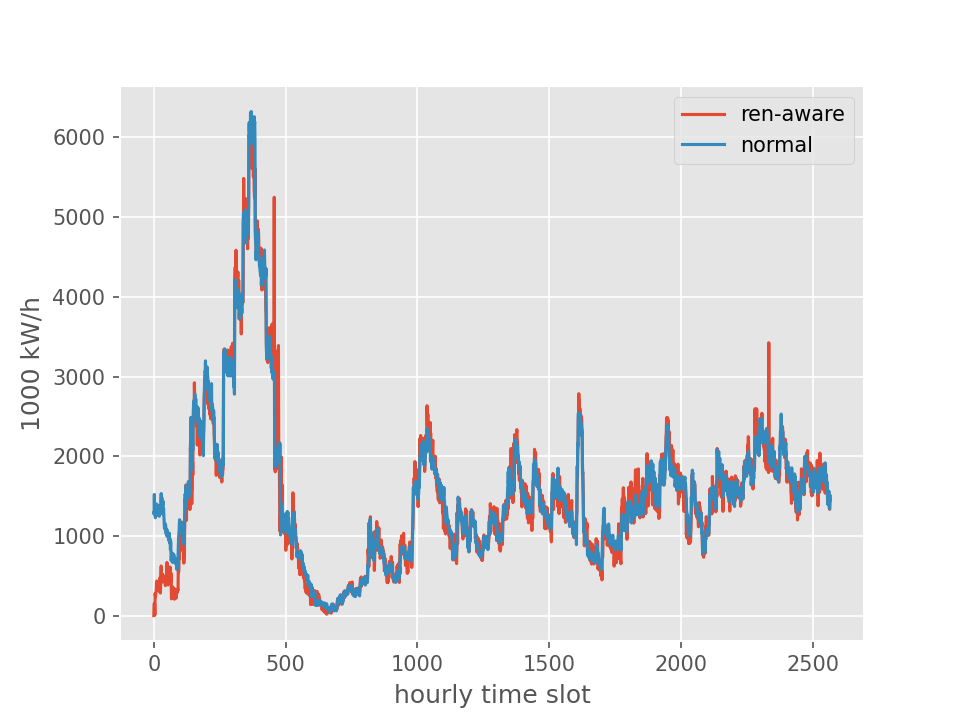

In [18]:
plt.close()
plt.plot(ren_wl, label='ren-aware')
plt.plot(nor_wl, label='normal')
plt.legend(loc='best')
plt.ylabel('1000 kW/h')
plt.xlabel('hourly time slot')
plt.show()

<IPython.core.display.Javascript object>


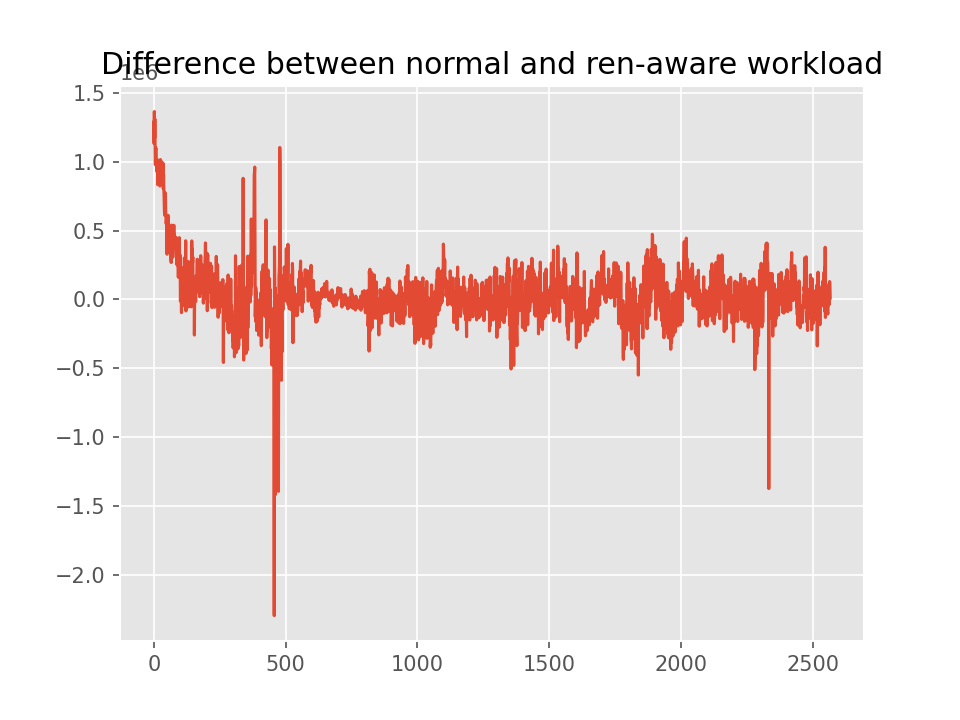

In [19]:
plt.close()
plt.plot(diff)
plt.title('Difference between normal and ren-aware workload')
plt.show()

In [20]:
diff2 = copy.deepcopy(diff)
# diff2.sort()
for i in range(5):
    print(diff2[i])

1288621.6
1133440.7999999998
1365620.8000000003
1171399.2000000002
1312582.4


In [21]:
d = np.array(diff2)
d.argsort()[-5:][::-1]

array([2, 4, 0, 3, 1], dtype=int64)

In [22]:
print(diff2[1501],diff2[2370],diff2[2274])
print(ren_wl[1501],ren_wl[2370],ren_wl[2274])
print(nor_wl[1501],nor_wl[2370],nor_wl[2274])

36990.39999999991 -2796.7999999998137 148567.19999999995
1149.9496000000001 1764.1671999999999 1590.244
1186.94 1761.3704000000002 1738.8111999999999


In [23]:
d.argsort()[:5][::-1]

array([ 484, 2334,  473,  460,  457], dtype=int64)

In [24]:
print(diff2[2191],diff2[1494],diff2[1757])
print(ren_wl[2191],ren_wl[1494],ren_wl[1757])
print(nor_wl[2191],nor_wl[1494],nor_wl[1757])

7231.199999999953 -5520.800000000047 106087.19999999984
1632.8192000000001 1255.9648 769.3432
1640.0504 1250.444 875.4304


<IPython.core.display.Javascript object>


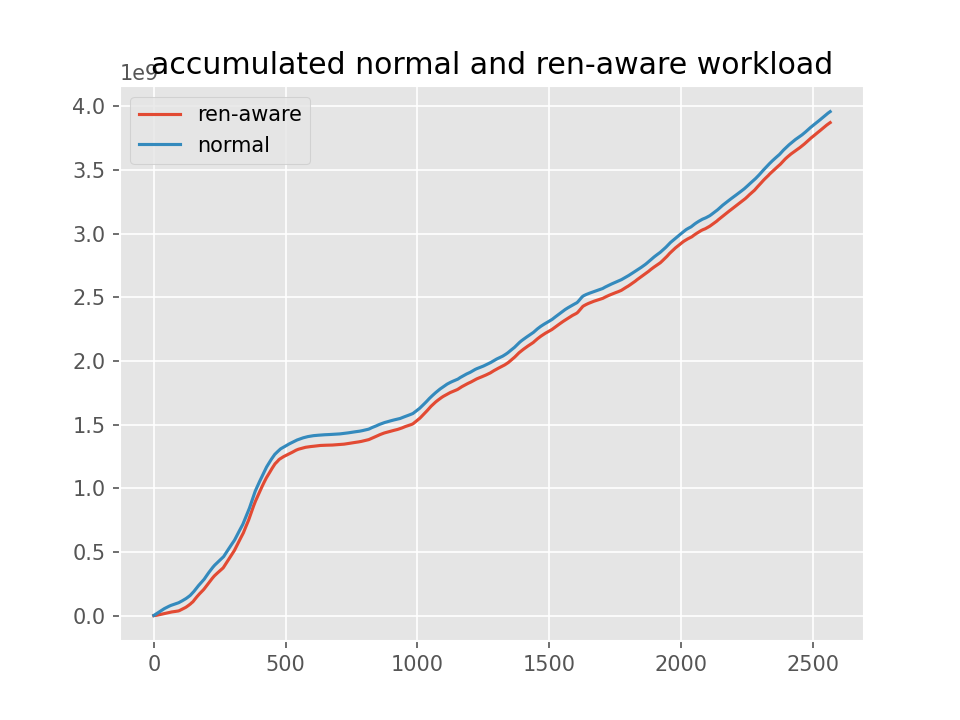

In [25]:
plt.close()
plt.plot(accu_ren_wl, label='ren-aware')
plt.plot(accu_nor_wl, label='normal')
plt.legend(loc='best')
plt.title('accumulated normal and ren-aware workload')
plt.show()

In [30]:
diff_accu = []
for i in range(len(accu_nor_wl)):
    diff_accu.append(accu_nor_wl[i] - accu_ren_wl[i])

<IPython.core.display.Javascript object>


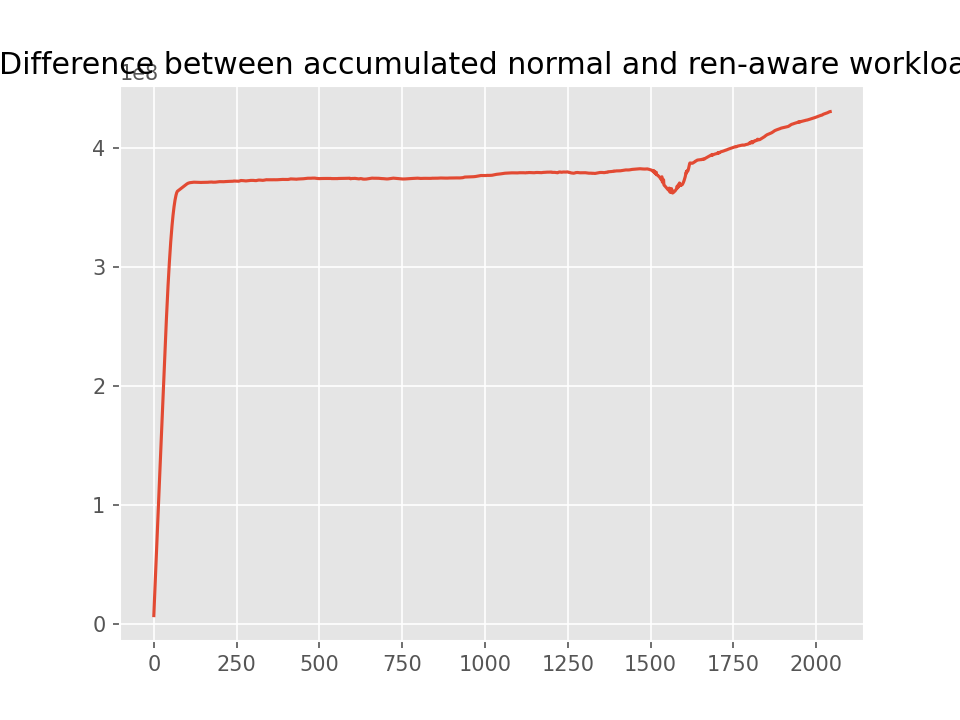

In [31]:
plt.close()
plt.plot(diff_accu)
plt.title('Difference between accumulated normal and ren-aware workload')
plt.show()

In [32]:
accu_ren_reduxCost = [x/1000000 for x in accu_ren_reduxCost]
accu_nor_reduxCost = [x/1000000 for x in accu_nor_reduxCost]

<IPython.core.display.Javascript object>


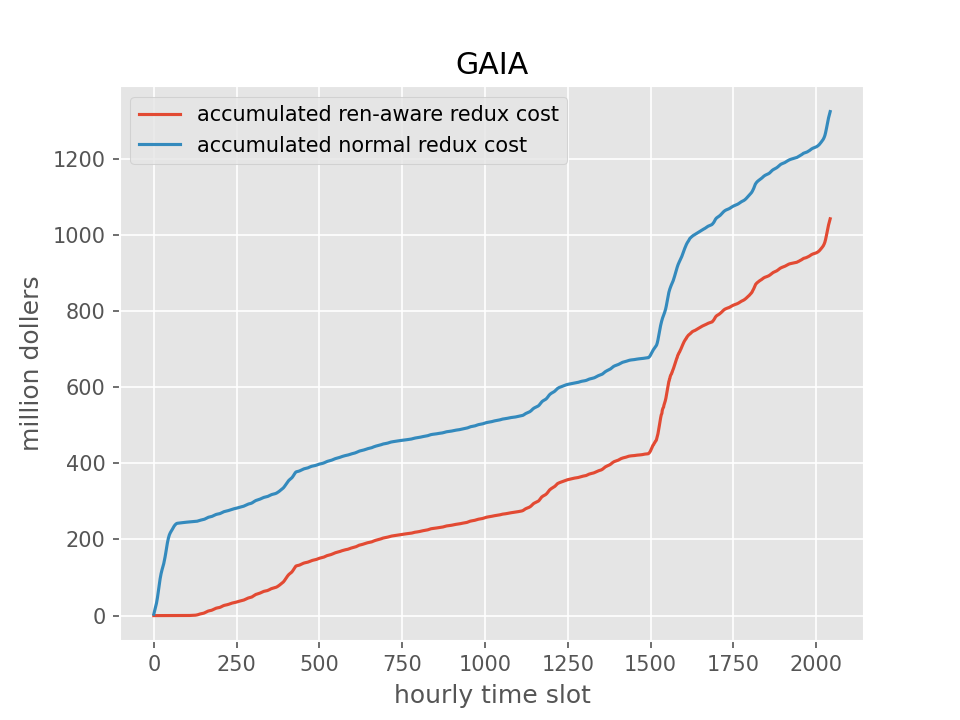

In [33]:
plt.close()
plt.plot(accu_ren_reduxCost, label='accumulated ren-aware redux cost')
plt.plot(accu_nor_reduxCost, label='accumulated normal redux cost')
plt.ylabel('million dollers')
plt.xlabel('hourly time slot')
plt.legend(loc='best')
plt.title('GAIA')
plt.show()

In [30]:
accu_ren_reduxCost_list = []
accu_nor_reduxCost_list = []
for i in [1000, 2000, -1]:
    accu_ren_reduxCost_list.append(round(accu_ren_reduxCost[i],2))
    accu_nor_reduxCost_list.append(round(accu_nor_reduxCost[i],2))
print(accu_ren_reduxCost_list)
print(accu_nor_reduxCost_list)

[257.13, 951.75, 1041.33]
[505.72, 1230.52, 1323.15]


In [34]:
atlas_ren = [10.73, 22.43, 39.87]
atlas_nor = [12.34, 23.31, 40.95]

In [35]:
sp2_ren = [13.03, 30.63, 36.88]
sp2_nor = [13.6, 32.92, 39.54]

In [36]:
blue_ren = [20.05, 35.68, 40.65]
blue_nor = [20.91, 37.4, 42.56]

In [37]:
ross_ren = [95.39, 201.36, 258.84]
ross_nor = [100.17, 205.47, 263.46]

In [38]:
gaia_ren = [257.13, 951.75, 1041.33]
gaia_nor = [505.72, 1230.52, 1323.15]

<IPython.core.display.Javascript object>


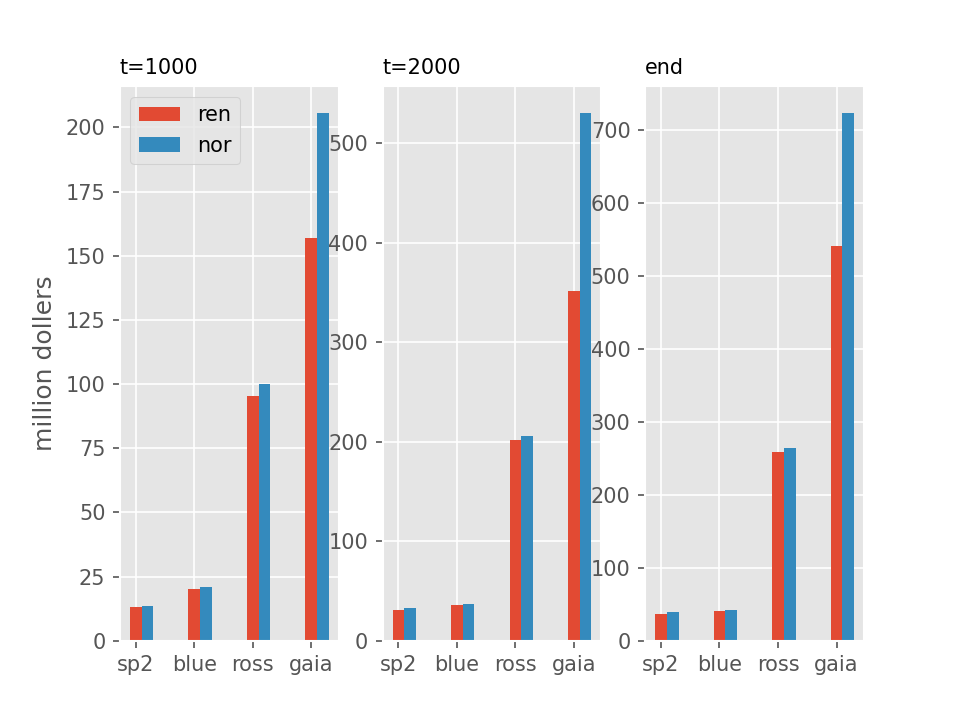

In [39]:
plt.close()
plt.figure()


labels = ['sp2', 'blue',  'ross', 'gaia']
x = np.arange(len(labels))
width = 0.2
ren1000 = [13.03, 20.05,95.39,157.13]
nor1000 = [13.6, 20.91,100.17,205.72]
ren2000 = [30.63,35.68,201.36,351.75]
nor2000 = [32.92,37.4,205.47,530.52]
renEnd = [36.88,40.65,258.84,541.33]
norEnd = [39.54,42.56,263.46,723.15]

# fig, ax = plt.subplots()
plt.subplot(131)
plt.title('t=1000', loc='left', fontdict={'fontsize':10})
# fig, ren1000x = plt.subplots()
plt.bar(x-width/2,ren1000,width,label='ren',tick_label = ['sp2', 'blue',  'ross', 'gaia'])
plt.bar(x+width/2,nor1000,width,label='nor')
# plt.bar(['sp2', 'blue',  'ross', 'gaia'],[13.03, 20.05,95.39,257.13],width=0.2)
# plt.bar(['sp2', 'blue',  'ross', 'gaia'],[16.03, 26.05,106.39,277.13],width=0.2)
plt.ylabel('million dollers')
plt.legend(loc='best')

plt.subplot(132)
plt.title('t=2000', loc='left', fontdict={'fontsize':10})
plt.bar(x-width/2,ren2000,width,label='ren',tick_label = ['sp2', 'blue',  'ross', 'gaia'])
plt.bar(x+width/2,nor2000,width,label='nor')

plt.subplot(133)
plt.title('end', loc='left', fontdict={'fontsize':10})
plt.bar(x-width/2,renEnd,width,label='ren',tick_label = ['sp2', 'blue',  'ross', 'gaia'])
plt.bar(x+width/2,norEnd,width,label='nor')


# plt.suptitle('Title')
plt.show()